<h1><center>Data Science <br>
    Customer Segmentation </center></h1>

## Team member's details:
<b> 1. Group Name: </b> Data Girl.<br>
<b> 2. Name:  </b>Fatimah Asiri.<br>
<b> 3. Email: </b> alassirifatima@gmail.com<br>
<b> 4. Country:  </b>Saudi Arabia. <br>
<b> 5. College/Company:  </b>Freelancer<br>
<b> 6. Specialization:  </b>Data Science


## Task

1. Business Understanding
2. Data Understanding
3. EDA
4. Feature Engineering
4. Model Building
5. Model Evaluation
6. Presentation (Recommendation slide is must)
7. Document the challenges.

## 1.  Business understanding

<b>1. Problem Statement:</b>

XYZ bank wants to roll out Christmas offers to their customers. But Bank does not want to roll out same offer to all customers  instead they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data ( pattern which group certain kind of customer in one category). Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 group as this will be inefficient for their campaign.

<b>2. ML Problem:</b>

ABC analytics proposed customer segmentation approach to Bank.


<hr>

## 2. Data Understanding

In [300]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio
template = 'simple_white'

import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

In [2]:
# Load data

df=pd.read_csv('cust_seg.csv')

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# to see head of data
df.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,1/28/2015,1375586,N,ES,H,35,1/12/2015,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,1/28/2015,1050611,N,ES,V,23,8/10/2012,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,1/28/2015,1050612,N,ES,V,23,8/10/2012,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,1/28/2015,1050613,N,ES,H,22,8/10/2012,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,1/28/2015,1050614,N,ES,V,23,8/10/2012,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
# to see basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   object 
 14  indresi            

In [5]:
# to Generate descriptive statistics for numeric  
df.describe()

,Unnamed: 0,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1000000.000000,1.000000e+06,989218.000000,989218.000000,989218.000000,989218.0,982266.000000,989218.000000,8.248170e+05,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,994598.000000,994598.000000,1000000.000000
mean,499999.500000,6.905967e+05,0.000489,1.109074,1.000085,1.0,26.852131,0.564971,1.396462e+05,0.000177,...,0.009982,0.014553,0.004661,0.072581,0.066084,0.039378,0.006442,0.071629,0.079543,0.166275
std,288675.278932,4.044084e+05,0.022114,3.267624,0.012954,0.0,12.422924,0.495761,2.389858e+05,0.013303,...,0.099410,0.119755,0.068112,0.259448,0.248429,0.194493,0.080003,0.257873,0.270584,0.372327
min,0.000000,1.588900e+04,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249999.750000,3.364110e+05,0.000000,1.000000,1.000000,1.0,18.000000,0.000000,7.157184e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,499999.500000,6.644760e+05,0.000000,1.000000,1.000000,1.0,28.000000,1.000000,1.066519e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,749999.250000,1.074511e+06,0.000000,1.000000,1.000000,1.0,33.000000,1.000000,1.634325e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,999999.000000,1.379131e+06,1.000000,99.000000,3.000000,1.0,52.000000,1.000000,2.889440e+07,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# to Generate descriptive statistics for obiect
df.describe(include=['object']) 

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov
count,1000000,989218,989218,989214,1000000,989218,1000000,1101,989218,989218,989218,178,989139,989218,982266
unique,2,5,113,2,115,6238,249,22,3,2,2,2,156,2,52
top,1/28/2015,N,ES,V,22,10/14/2013,21,7/1/2015,A,S,N,N,KAT,N,MADRID
freq,625457,988260,982264,562000,51017,3920,34320,97,547800,982264,946328,176,313944,986107,360131


In [7]:
# to see the data types for each column
df.dtypes

Unnamed: 0                 int64
fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes              float64
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [8]:
# Shape of data (rows, columns)
df.shape

(1000000, 48)

In [9]:
# Count the null values in each column
df.isna().sum()

Unnamed: 0                    0
fecha_dato                    0
ncodpers                      0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                           0
fecha_alta                10782
ind_nuevo                 10782
antiguedad                    0
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
tipodom                   10782
cod_prov                  17734
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop

In [10]:
# Count the unique values for each coulmn
df.nunique()

Unnamed: 0               1000000
fecha_dato                     2
ncodpers                  626159
ind_empleado                   5
pais_residencia              113
sexo                           2
age                          115
fecha_alta                  6238
ind_nuevo                      2
antiguedad                   249
indrel                         2
ult_fec_cli_1t                22
indrel_1mes                    3
tiprel_1mes                    3
indresi                        2
indext                         2
conyuemp                       2
canal_entrada                156
indfall                        2
tipodom                        1
cod_prov                      52
nomprov                       52
ind_actividad_cliente          2
renta                     395668
ind_ahor_fin_ult1              2
ind_aval_fin_ult1              2
ind_cco_fin_ult1               2
ind_cder_fin_ult1              2
ind_cno_fin_ult1               2
ind_ctju_fin_ult1              2
ind_ctma_f

<h3> Handling with columns </h3> 

<h4> Handling column Unnamed: 0 </h4>

In [11]:
# Delete column Unnamed: 0
# becouse the coulmn have the ascending order start from 0 and this order found Ascending order automatically

df.drop('Unnamed: 0', inplace=True, axis=1)

<h4> Handling column fecha_dato </h4>

In [12]:
# Show the unique values
# Description the column: The table is partitioned for this column

df['fecha_dato'].unique()

array(['1/28/2015', '2/28/2015'], dtype=object)

In [13]:
# Count the null values

df['fecha_dato'].isna().sum()

0

In [14]:
# Count the values in the column

df['fecha_dato'].value_counts()

1/28/2015    625457
2/28/2015    374543
Name: fecha_dato, dtype: int64

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


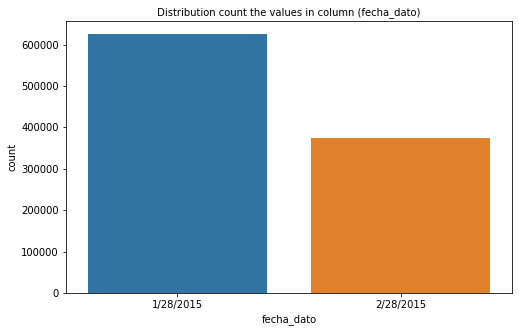

In [15]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (fecha_dato) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["fecha_dato"])


# Figure show
plt.show();

<h5> Summary </h5>

The column fecha_dato has 2 unique values ('1/28/2015', '2/28/2015') <br>
Value (1/28/2015) is higher than  Value (2/28/2015) by <br>
1/28/2015    625457 <br>
2/28/2015    374543

<h4> Handling column ncodpers </h4>

In [16]:
# Show the unique values
# Description the column: Customer code
df['ncodpers'].unique()

array([1375586, 1050611, 1050612, ..., 1149999, 1150908, 1183305],
      dtype=int64)

In [17]:
# Count the null values

df['ncodpers'].isna().sum()

0

In [18]:
# Count the values in the column

df['ncodpers'].value_counts()

281941     2
362212     2
362218     2
362219     2
362220     2
          ..
1310578    1
1310579    1
1310645    1
1310643    1
1183305    1
Name: ncodpers, Length: 626159, dtype: int64

In [19]:
# Rename the column name

df.rename(columns = {'ncodpers':'Customer Code'}, inplace = True)

<h5> Summary </h5>

The column ncodpers
1. decription of column has Customer code 
2. No missing values
3. change column name to Customer Code

<h4> Handling column ind_empleado </h4>

In [20]:
# Show the unique values
# Description the column: Employee index: A active, B ex employed, F filial, N not employee, P pasive
df['ind_empleado'].unique()

array(['N', nan, 'A', 'B', 'F', 'S'], dtype=object)

In [21]:
# Count the null values

df['ind_empleado'].isna().sum()

10782

In [22]:
# Handling missing values by mode 

df['ind_empleado'] = df['ind_empleado'].fillna(df['ind_empleado'].mode()[0])

In [23]:
# Count the null values after handling

df['ind_empleado'].isna().sum()

0

In [24]:
# Count the values in the column

df['ind_empleado'].value_counts()

N    999042
B       387
A       287
F       282
S         2
Name: ind_empleado, dtype: int64

In [25]:
# Rename the column name

df.rename(columns = {'ind_empleado':'Employee Index'}, inplace = True)

<h5> Summary </h5>

1. Description of column is Employee index
2. Has 5 values 
3. Handling missing values by mode
4. Rename the column name from ind_empleado to Employee Index


<h4> Handling column pais_residencia </h4>

In [26]:
# Show the unique values
# Description the column: Customer's Country residence 
df['pais_residencia'].unique()

array(['ES', nan, 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE',
       'DO', 'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO',
       'HN', 'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR',
       'NI', 'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU',
       'GT', 'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET',
       'CM', 'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE',
       'SG', 'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK',
       'UY', 'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR',
       'GH', 'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN',
       'GW', 'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF',
       'GM', 'KZ', 'CD', 'BZ'], dtype=object)

In [27]:
# Count the null values

df['pais_residencia'].isna().sum()

10782

In [28]:
# Handling missing values by mode

df['pais_residencia'] = df['pais_residencia'].fillna(df['pais_residencia'].mode()[0])

In [29]:
# Count the null values after handling

df['pais_residencia'].isna().sum()

0

In [30]:
# Count the values in the column

df['pais_residencia'].value_counts()

ES    993046
FR       546
AR       542
DE       487
GB       480
       ...  
TN         2
LB         2
GE         2
BZ         2
AL         1
Name: pais_residencia, Length: 113, dtype: int64

In [31]:
# Rename the column name

df.rename(columns = {'pais_residencia':'Country residence'}, inplace = True)

<h5> Summary </h5>

1. Description of column is Customer's Country residence 
2. Has alot values 
3. Handling missing values by mode
4. Rename the column name from ind_empleado to Country residence 

<h4> Handling column sexo </h4>

In [32]:
# Show the unique values
# Description the column: Customer's sex
df['sexo'].unique()

array(['H', 'V', nan], dtype=object)

In [33]:
# Count the null values

df['sexo'].isna().sum()

10786

In [34]:
# Handling missing values by mode

df['sexo'] = df['sexo'].fillna(df['sexo'].mode()[0])

In [35]:
# Count the null values after handling

df['sexo'].isna().sum()

0

In [36]:
# Repalce  V to F and H to M

df['sexo'] = df['sexo'].replace(['H', 'V'], [ 'M','F'])

In [37]:
# Rename the coulmn name

df.rename(columns = {'sexo':'sex'}, inplace = True)

In [38]:
# Count the values in the column

df['sex'].value_counts()

F    572786
M    427214
Name: sex, dtype: int64

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


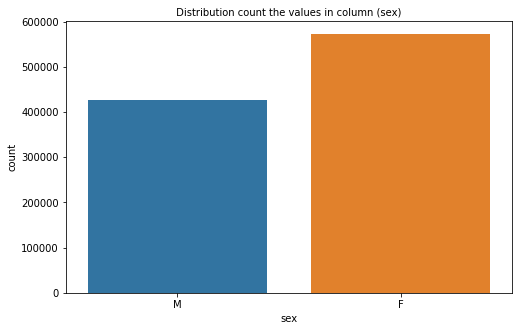

In [39]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (sex) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["sex"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of column is Customer's sex  
2. Has 2 values  H and V
3. Handling missing values by mode
4. Rename the column name from Sexo to sex
5. Repalce V by F and H by M
6. Female Customer higher than male Customer
7. F    572786 <br>
    M    427214


<h4> Handling column age </h4>

In [40]:
# Show the unique values
# Description the column: Customer's Age 
df['age'].unique()

array(['35', '23', '22', '24', '65', '28', '25', '26', '53', '27', '32',
       '37', '31', '39', '63', '33', '55', '42', '58', '38', '50', '30',
       '45', '44', '36', '29', '60', '57', '67', '47', ' NA', '34', '48',
       '46', '54', '84', '15', '12', '8', '6', '83', '40', '77', '69',
       '52', '59', '43', '10', '9', '49', '41', '51', '78', '16', '11',
       '73', '62', '66', '17', '68', '82', '95', '96', '56', '61', '79',
       '72', '14', '19', '13', '86', '64', '20', '89', '71', '7', '70',
       '74', '21', '18', '75', '4', '80', '81', '5', '76', '92', '93',
       '85', '91', '87', '90', '94', '99', '98', '88', '97', '100', '101',
       '106', '103', '3', '2', '102', '104', '111', '107', '109', '105',
       '112', '115', '110', '116', '108', '113'], dtype=object)

In [41]:
# Delete value from column
df.drop(df[df['age'] == ' NA'].index, inplace = True)

In [42]:
df['age'].unique()

array(['35', '23', '22', '24', '65', '28', '25', '26', '53', '27', '32',
       '37', '31', '39', '63', '33', '55', '42', '58', '38', '50', '30',
       '45', '44', '36', '29', '60', '57', '67', '47', '34', '48', '46',
       '54', '84', '15', '12', '8', '6', '83', '40', '77', '69', '52',
       '59', '43', '10', '9', '49', '41', '51', '78', '16', '11', '73',
       '62', '66', '17', '68', '82', '95', '96', '56', '61', '79', '72',
       '14', '19', '13', '86', '64', '20', '89', '71', '7', '70', '74',
       '21', '18', '75', '4', '80', '81', '5', '76', '92', '93', '85',
       '91', '87', '90', '94', '99', '98', '88', '97', '100', '101',
       '106', '103', '3', '2', '102', '104', '111', '107', '109', '105',
       '112', '115', '110', '116', '108', '113'], dtype=object)

In [43]:
# Count the null values

df['age'].isna().sum()

0

In [44]:
# Count the values in the column

df['age'].value_counts()

22     51017
23     45366
24     38992
21     34015
44     28800
       ...  
110       14
115       12
2         11
113        8
116        4
Name: age, Length: 114, dtype: int64

<h5> Summary </h5>

1. Description of column: Customer's age
2. No missing Values
3. Has lot of Values

<h4> Handling column fecha_alta </h4>

In [45]:
# Show the unique values
# Description the column: The date in which the customer became as the first holder of a contract in the bank
df['fecha_alta'].unique()

array(['1/12/2015', '8/10/2012', '8/16/2012', ..., '1/31/2015',
       '2/17/2015', '2/1/2015'], dtype=object)

In [46]:
# Count the null values

df['fecha_alta'].isna().sum()

0

In [47]:
# Handling missing values by mode

df['fecha_alta'] = df['fecha_alta'].fillna(df['fecha_alta'].mode()[0])

In [48]:
# Count the null values after handling 

df['fecha_alta'].isna().sum()

0

In [49]:
# Count the values in the column

df['fecha_alta'].value_counts()

10/14/2013    3920
8/3/2013      3738
7/28/2014     3285
10/3/2014     2861
10/11/2013    2686
              ... 
5/19/2013        1
9/13/2014        1
3/19/2011        1
10/12/2014       1
2/1/2015         1
Name: fecha_alta, Length: 6238, dtype: int64

In [50]:
# Rename the Column name 

df.rename(columns = {'fecha_alta':'Register Date'}, inplace = True)

<h5> Summary </h5>

1. Description of column: The date in which the customer became as the first holder of a contract in the bank
2. Handling missing Values by mode 
3. Has lot of Values
4. Rename column name from fecha_alta to Riegiter Date

<h4> Handling column ind_nuevo </h4>

In [51]:
# Show the unique values
# Description the column: New customer Index. 1 if the customer registered in the last 6 months.
df['ind_nuevo'].unique()

array([0., 1.])

In [52]:
# Count the null values

df['ind_nuevo'].isna().sum()

0

In [53]:
# Handling missing values by mode

df['ind_nuevo'] = df['ind_nuevo'].fillna(df['ind_nuevo'].mode()[0])

In [54]:
# Count the null values after handling

df['ind_nuevo'].isna().sum()

0

In [55]:
# Count the values in the column

df['ind_nuevo'].value_counts()

0.0    988734
1.0       484
Name: ind_nuevo, dtype: int64

In [56]:
# Rename the column name

df.rename(columns = {'ind_nuevo':'New customer'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


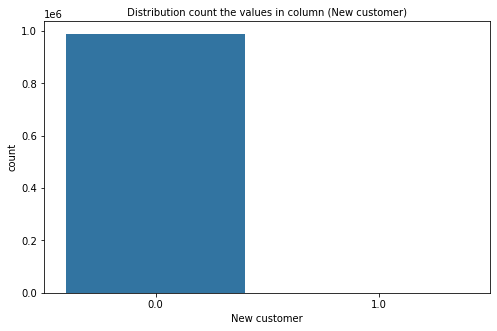

In [57]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (New customer) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["New customer"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Decription of column:  New customer Index. 1 if the customer registered in the last 6 months.
2. Has 2 values 1 or 0 
3. Handling missing values by mode
4. Rename column name from ind_nuevo to New customer
5. Count of values in the column  <br>
    0.0    999516 <br>
    1.0       484

<h4> Handling column antiguedad</h4>

In [58]:
# Show the unique values
# Description the column:Customer seniority (in months)
df['antiguedad'].unique()

array(['6', '35', '34', '33', '31', '21', '16', '27', '9', '22', '13',
       '29', '8', '11', '10', '28', '24', '7', '25', '14', '26', '12',
       '23', '1', '18', '4', '3', '17', '32', '30', '20', '15', '19',
       '157', '36', '5', '40', '38', '37', '39', '0', '2', '47', '44',
       '42', '46', '45', '43', '41', '57', '48', '52', '49', '50', '56',
       '58', '51', '55', '54', '53', '59', '62', '61', '60', '63', '139',
       '165', '118', '164', '142', '94', '159', '143', '105', '151',
       '162', '137', '150', '128', '122', '156', '119', '160', '79', '95',
       '132', '161', '98', '127', '72', '155', '108', '163', '102', '148',
       '115', '146', '107', '81', '216', '135', '92', '121', '198', '134',
       '93', '140', '110', '120', '147', '116', '64', '77', '85', '99',
       '78', '100', '113', '154', '166', '133', '124', '141', '66', '117',
       '86', '193', '80', '144', '87', '126', '158', '101', '235', '88',
       '145', '103', '149', '109', '131', '97', '68', '8

In [59]:
# Count the null values

df['antiguedad'].isna().sum()

0

In [60]:
# Count the values in the column

df['antiguedad'].value_counts()

21         34320
23         23122
24         20467
12         19155
20         18582
           ...  
0             49
2             46
1             37
3             33
-999999        4
Name: antiguedad, Length: 248, dtype: int64

In [61]:
# Rename the column name

df.rename(columns = {'antiguedad':'Customer Seniority'}, inplace = True)

<h5> Summary </h5>

1. Description the column:Customer seniority (in months)
2. No missing values 
3. Remname the column name from antiguedad to Customer Seniority

<h4> Handling column indrel </h4>

In [62]:
# Show the unique values
# Description the column: 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
df['indrel'].unique()

array([ 1., 99.])

In [63]:
# Count the null values

df['indrel'].isna().sum()

0

In [64]:
# Handling missing values by mode

df['indrel'] = df['indrel'].fillna(df['indrel'].mode()[0])

In [65]:
# Count the values in the column

df['indrel'].value_counts()

1.0     988117
99.0      1101
Name: indrel, dtype: int64

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


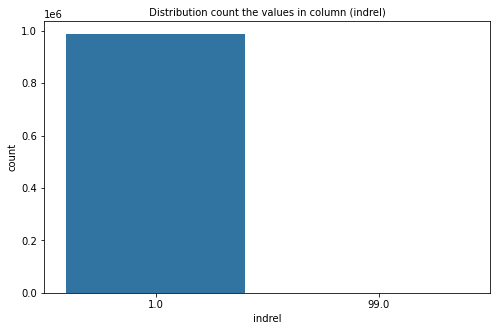

In [66]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (indrel) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["indrel"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description the column: 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
2. Has 2 Values 1.0 or 99.0 
3. Handling Missing values

<h4> Handling column ult_fec_cli_1t</h4>


In [67]:
# Show the unique values
# Description the column: Last date as primary customer (if he isn't at the end of the month)
df['ult_fec_cli_1t'].unique()

array([nan, '7/2/2015', '7/23/2015', '7/6/2015', '7/30/2015', '7/20/2015',
       '7/8/2015', '7/22/2015', '7/17/2015', '7/9/2015', '7/3/2015',
       '7/29/2015', '7/13/2015', '7/21/2015', '7/27/2015', '7/14/2015',
       '7/1/2015', '7/24/2015', '7/15/2015', '7/16/2015', '7/28/2015',
       '7/7/2015', '7/10/2015'], dtype=object)

In [68]:
# Count the null values

df['ult_fec_cli_1t'].isna().sum()

988117

In [69]:
# Drop the column becouse a 99% from value in this column missing 

df.drop('ult_fec_cli_1t', inplace=True, axis=1)

<h5> Summary </h5>

1. Description the column: Last date as primary customer (if he isn't at the end of the month)
2. Drop the Column 

<h4> Handling column indrel_1mes  </h4>

In [70]:
# Show the unique values
# Description the column: Customer type at the beginning of the month ,
#1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)

df['indrel_1mes'].unique()

array([1., 3., 2.])

In [71]:
# Count the null values

df['indrel_1mes'].isna().sum()

0

In [72]:
# Handling missing values by mode

df['indrel_1mes'] = df['indrel_1mes'].fillna(df['indrel_1mes'].mode()[0])

In [73]:
# Count the null values after handling

df['indrel_1mes'].isna().sum()

0

In [74]:
# Count the values in the column

df['indrel_1mes'].value_counts()

1.0    989175
3.0        41
2.0         2
Name: indrel_1mes, dtype: int64

In [75]:
# Rename the column name

df.rename(columns = {'indrel_1mes':'Customer Type'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


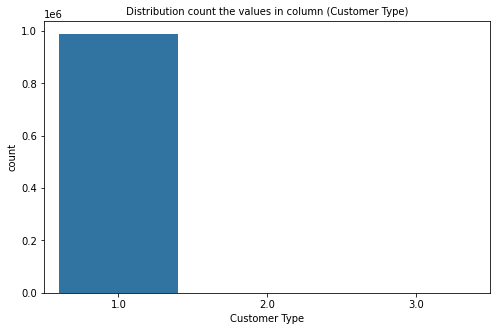

In [76]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Customer Type) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Customer Type"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description the column: Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
2. Handling missing values
3. Rename the column name

<h4> Handling column tiprel_1mes </h4>

In [77]:
# Show the unique values
# Description the column: Customer relation type at the beginning of the month,
# A (active), I (inactive), P (former customer),R (Potential)

df['tiprel_1mes'].unique()

array(['A', 'I', 'P'], dtype=object)

In [78]:
# Count the null values

df['tiprel_1mes'].isna().sum()

0

In [79]:
# Handling missing values by mode

df['tiprel_1mes'] = df['tiprel_1mes'].fillna(df['tiprel_1mes'].mode()[0])

In [80]:
# Count the null values after handling

df['tiprel_1mes'].isna().sum()

0

In [81]:
# Count the values in the column

df['tiprel_1mes'].value_counts()

A    547800
I    441377
P        41
Name: tiprel_1mes, dtype: int64

In [82]:
# Rename the column name

df.rename(columns = {'tiprel_1mes':'Customer Relation Type'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


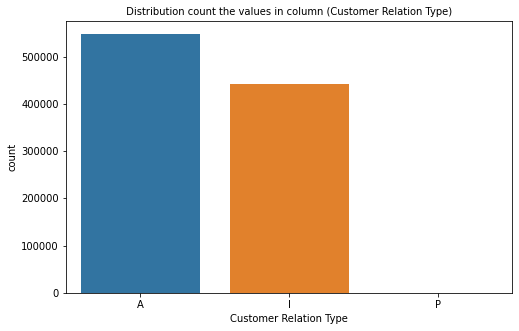

In [83]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Customer Relation Type) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Customer Relation Type"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description the column: Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential).
2. Has 3 Values 
3. Handling missing values 
4. Rename the column name 

<h4> Handling column indresi</h4>

In [84]:
# Show the unique values
# Description the column:Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
df['indresi'].unique()

array(['S', 'N'], dtype=object)

In [85]:
# Count the null values

df['indresi'].isna().sum()

0

In [86]:
# Handling missing values by mode

df['indresi'] = df['indresi'].fillna(df['indresi'].mode()[0])

In [87]:
# Count the null values after handling

df['indresi'].isna().sum()

0

In [88]:
# Count the values in the column

df['indresi'].value_counts()

S    982264
N      6954
Name: indresi, dtype: int64

In [89]:
# Rename the column name

df.rename(columns = {'indresi':'Residence Index'}, inplace = True)

In [90]:
# Repalce  S to Yes and N to No

df['Residence Index'] = df['Residence Index'].replace(['S', 'N'], [ 'Yes','No'])

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


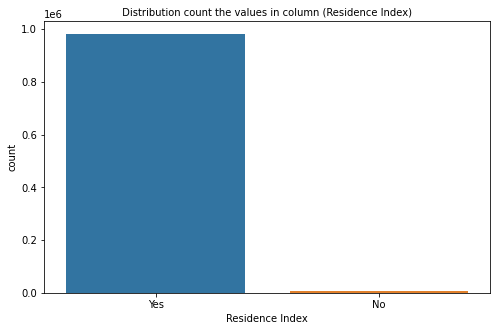

In [91]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Residence Index) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Residence Index"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description the column:Residence index (S (Yes) or N (No) if the residence country is the same than the bank country).
2. Handling missing values
3. Has 2 values Yes or No
4. Rename the column name from indresi to Residence Index
5. Repalce  S to Yes and N to No

<h4> Handling column indext </h4>

In [92]:
# Show the unique values
# Description the column:Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
df['indext'].unique()

array(['N', 'S'], dtype=object)

In [93]:
# Count the null values

df['indext'].isna().sum()

0

In [94]:
# Handling missing values by mode

df['indext'] = df['indext'].fillna(df['indext'].mode()[0])

In [95]:
# Count the null values after handling

df['indext'].isna().sum()

0

In [96]:
# Count the values in the column

df['indext'].value_counts()

N    946328
S     42890
Name: indext, dtype: int64

In [97]:
# Repalce  S to Yes and N to No

df['indext'] = df['indext'].replace(['S', 'N'], [ 'Yes','No'])

In [98]:
# Rename the column name

df.rename(columns = {'indext':'Foreigner Index'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


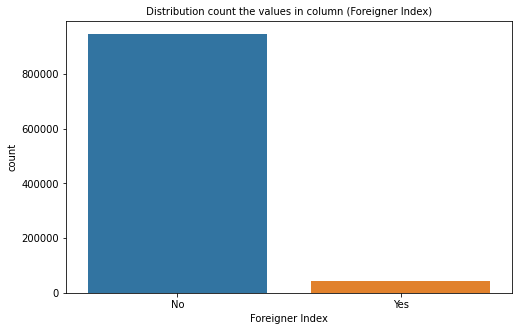

In [99]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Foreigner Index) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Foreigner Index"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description the column:Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
2. Has 2 values Yes or No 
3. Handling Missing values 
4. Rename column name 
5. Replace S by Yes and N by No

<h4> Handling column conyuemp </h4>

In [100]:
# Show the unique values
# Description the column:Spouse index. 1 if the customer is spouse of an employee
df['conyuemp'].unique()

array([nan, 'N', 'S'], dtype=object)

In [101]:
# Count the null values

df['conyuemp'].isna().sum()

989040

In [102]:
# Drop the column becouse a 99% from value in this column missing 

df.drop('conyuemp', inplace=True, axis=1)

<h5> Summary </h5>

1. Description the column:Spouse index. 1 if the customer is spouse of an employee
2. Drop the column

<h4> Handling column canal_entrada </h4>

In [103]:
# Show the unique values
# Description the column: channel used by the customer to join
df['canal_entrada'].unique()

array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', 'KAZ', 'RED', 'KHC',
       'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KEH', 'KAD', 'KBG', nan, 'KGC',
       'KHF', 'KFK', 'KHN', 'KHA', 'KAF', 'KGX', 'KFD', 'KAG', 'KFG',
       'KAB', 'KCC', 'KAE', 'KAH', 'KAR', 'KFJ', 'KFL', 'KAI', 'KFU',
       'KAQ', 'KFS', 'KAA', 'KFP', 'KAJ', 'KFN', 'KGV', 'KGY', 'KFF',
       'KAP', 'KDE', 'KFV', '13', 'K00', 'KAK', 'KCK', 'KCL', 'KAY',
       'KBU', 'KDR', 'KAC', 'KDT', 'KCG', 'KDO', 'KDY', 'KBQ', 'KDA',
       'KBO', 'KCI', 'KEC', 'KBZ', 'KES', 'KDX', 'KAS', '7', 'KEU', 'KCA',
       'KAL', 'KDC', 'KAW', 'KCS', 'KCB', 'KDU', 'KDQ', 'KCN', 'KCM', '4',
       'KCH', 'KCD', 'KCE', 'KEV', 'KBL', 'KEA', 'KBH', 'KDV', 'KFT',
       'KEY', 'KAO', 'KEJ', 'KEO', 'KEI', 'KEW', 'KDZ', 'KBV', 'KBR',
       'KBF', 'KDP', 'KCO', 'KCF', 'KCV', 'KAM', 'KEZ', 'KBD', 'KAN',
       'KBY', 'KCT', 'KDD', 'KBW', 'KCU', 'KBX', 'KDB', 'KBS', 'KBE',
       'KCX', 'KBP', 'KBN', 'KEB', 'KDS', 'KEL', 'KDG', 'KDF', 'KEF',
      

In [104]:
# Count the null values

df['canal_entrada'].isna().sum()

79

In [105]:
# Handling missing values by mode

df['canal_entrada'] = df['canal_entrada'].fillna(df['canal_entrada'].mode()[0])

In [106]:
# Count the null values after handling

df['canal_entrada'].isna().sum()

0

In [107]:
# Rename the column name

df.rename(columns = {'canal_entrada':'Channel'}, inplace = True)

In [108]:
# Count the values in the column

df['Channel'].value_counts()

KAT    314023
KFC    259035
KHE    249254
KFA     37733
KAS      8190
        ...  
KDI         2
KDB         2
KBN         2
KGN         1
KGC         1
Name: Channel, Length: 156, dtype: int64

<h5> Summary </h5>

1. Description the column: channel used by the customer to join
2. Handling missing values
3. Rename column name

<h4> Handling column indfall </h4>

In [109]:
# Show the unique values
# Description the column:Deceased index. N/S
df['indfall'].unique()

array(['N', 'S'], dtype=object)

In [110]:
# Count the null values

df['indfall'].isna().sum()

0

In [111]:
# Handling missing values by mode

df['indfall'] = df['indfall'].fillna(df['indfall'].mode()[0])

In [112]:
# Count the null values after handling

df['indfall'].isna().sum()

0

In [113]:
# Repalce  S to Yes and N to No

df['indfall'] = df['indfall'].replace(['S', 'N'], [ 'Yes','No'])

In [114]:
# Rename the column name

df.rename(columns = {'indfall':'Deceased Index'}, inplace = True)

In [115]:
# Count the values in the column

df['Deceased Index'].value_counts()

No     986107
Yes      3111
Name: Deceased Index, dtype: int64

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


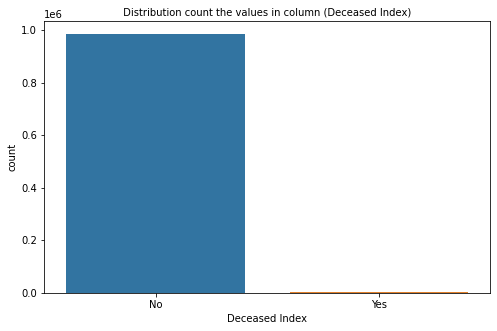

In [116]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Deceased Index) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Deceased Index"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description the column:Deceased index. N/S
2. Handling missing data
3. Rename column name from indfall to Deceased Index
4. Replace values N by No anf S by yes

<h4> Handling column tipodom  </h4>

In [117]:
# Show the unique values
# Description the column: Addres type. 1, primary address
df['tipodom'].unique()

array([1.])

In [118]:
# Count the null values

df['tipodom'].isna().sum()

0

In [119]:
# Replace nan value by 0 in column

df.tipodom = df.tipodom.fillna('0')

In [120]:
# Count the values in the column

df['tipodom'].value_counts()

1.0    989218
Name: tipodom, dtype: int64

In [121]:
# Rename the column name

df.rename(columns = {'tipodom':'Addres Type'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


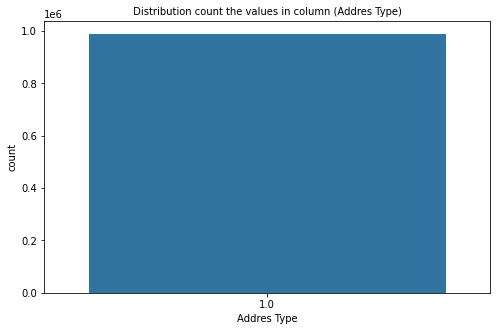

In [122]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Addres Type) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Addres Type"])


# Figure show
plt.show();

<h5> Summary </h5>

<h4> Handling column  cod_prov</h4>

In [123]:
# Show the unique values
# Description the column: Province code (customer's address)
df['cod_prov'].unique()

array([29., 13., 50., 45., 24., 20., 10., 17., 49.,  8., 37.,  9., 22.,
       31.,  5., 40., 27., 25., 28.,  3., 42., 41., 39.,  7., 47., 36.,
       46., 44., 15., 32., 23., 16., 48., 12., 26.,  2.,  6., 30., 11.,
        4., 19., 34., 35., 14., 21., 18., 33., 38., 52., 43.,  1., nan,
       51.])

In [124]:
# Count the null values

df['cod_prov'].isna().sum()

6952

In [125]:
# Handling missing values by mode

df['cod_prov'] = df['cod_prov'].fillna(df['cod_prov'].mode()[0])

In [126]:
# Count the null values after handling

df['cod_prov'].isna().sum()

0

In [127]:
# Rename the column name

df.rename(columns = {'cod_prov':'Province code'}, inplace = True)

In [128]:
# Count the values in the column

df['Province code'].value_counts()

28.0    367083
8.0      87372
46.0     46394
41.0     43922
15.0     27545
29.0     26798
30.0     24782
50.0     24621
3.0      20323
11.0     20292
33.0     18399
36.0     17482
47.0     16657
35.0     15976
48.0     15597
18.0     12930
45.0     12131
6.0      11909
39.0     11264
37.0     10650
14.0      9829
7.0       8361
10.0      8347
21.0      7923
13.0      7782
2.0       7294
12.0      6711
31.0      6584
9.0       6403
43.0      6120
26.0      5992
24.0      5968
17.0      5735
20.0      5708
27.0      5259
32.0      5151
38.0      5080
25.0      4846
23.0      4492
19.0      4327
4.0       4021
16.0      3768
34.0      3224
49.0      3213
40.0      2979
1.0       2878
22.0      2657
5.0       2573
44.0      1397
42.0      1179
52.0       764
51.0       526
Name: Province code, dtype: int64

<h5> Summary </h5>

1. Description the column: Province code (customer's address)
2. Handling missing values by mode
3. Rename Column name from cod_prov to Province code

<h4> Handling column nomprov  </h4>

In [129]:
# Show the unique values
# Description the column: Province Name
df['nomprov'].unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA',
       'MADRID', 'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA',
       'BALEARS, ILLES', 'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL',
       'CORUÑA, A', 'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA', 'CASTELLON',
       'RIOJA, LA', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ', 'ALMERIA',
       'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA', 'HUELVA',
       'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE', 'MELILLA',
       'TARRAGONA', 'ALAVA', nan, 'CEUTA'], dtype=object)

In [130]:
# Count the null values

df['nomprov'].isna().sum()

6952

In [131]:
# Handling missing values by mode

df['nomprov'] = df['nomprov'].fillna(df['nomprov'].mode()[0])

In [132]:
# Count the null values after handling

df['nomprov'].isna().sum()

0

In [133]:
# Rename the column name

df.rename(columns = {'nomprov':'Province Name'}, inplace = True)

In [134]:
# Count the values in the column

df['Province Name'].value_counts()

MADRID                    367083
BARCELONA                  87372
VALENCIA                   46394
SEVILLA                    43922
CORUÑA, A                  27545
MALAGA                     26798
MURCIA                     24782
ZARAGOZA                   24621
ALICANTE                   20323
CADIZ                      20292
ASTURIAS                   18399
PONTEVEDRA                 17482
VALLADOLID                 16657
PALMAS, LAS                15976
BIZKAIA                    15597
GRANADA                    12930
TOLEDO                     12131
BADAJOZ                    11909
CANTABRIA                  11264
SALAMANCA                  10650
CORDOBA                     9829
BALEARS, ILLES              8361
CACERES                     8347
HUELVA                      7923
CIUDAD REAL                 7782
ALBACETE                    7294
CASTELLON                   6711
NAVARRA                     6584
BURGOS                      6403
TARRAGONA                   6120
RIOJA, LA 

<h5> Summary </h5>

1. Description the column: Province Name 
2. Handling missing values by mode
3. Rename Column name from nomprov to Province Name

<h4> Handling column ind_actividad_cliente  </h4>

In [135]:
# Show the unique values
# Description the column: Activity index (1, active customer; 0, inactive customer)
df['ind_actividad_cliente'].unique()

array([1., 0.])

In [136]:
# Count the null values

df['ind_actividad_cliente'].isna().sum()

0

In [137]:
# Handling missing values by mode

df['ind_actividad_cliente'] = df['ind_actividad_cliente'].fillna(df['ind_actividad_cliente'].mode()[0])

In [138]:
# Count the null values after handling

df['ind_actividad_cliente'].isna().sum()

0

In [139]:
# Rename the column name

df.rename(columns = {'ind_actividad_cliente':'Activity Index'}, inplace = True)

In [140]:
# Count the values in the column

df['Activity Index'].value_counts()

1.0    558879
0.0    430339
Name: Activity Index, dtype: int64

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


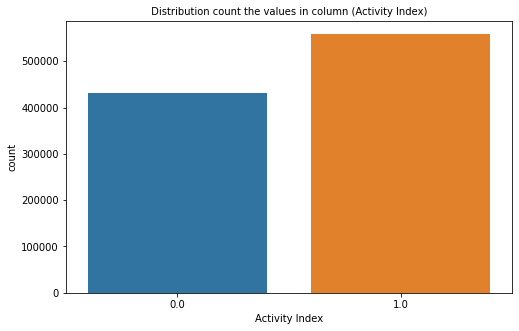

In [141]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Activity Index) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Activity Index"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Dexcription of the Column: Activity index (1, active customer; 0, inactive customer)
2. Handling Missing values by mode 
3. Rename column name from ind_actividad_cliente to Activity Index

<h4> Handling column renta </h4>

In [142]:
# Show the unique values
# Description the column:Gross income of the household
df['renta'].unique()

array([ 87218.1 ,  35548.74, 122179.11, ..., 207276.15, 193597.59,
       138471.78])

In [143]:
# Count the null values

df['renta'].isna().sum()

164401

In [144]:
# Handling missing values by mode

df['renta'] = df['renta'].fillna(df['renta'].median())

In [145]:
# Count the null values after handling 

df['renta'].isna().sum()

0

In [146]:
# Rename the column name

df.rename(columns = {'renta':'Gross Income'}, inplace = True)

In [147]:
# Count the values in the column

df['Gross Income'].value_counts()

106651.86    164403
451931.22       543
463625.16       159
181042.20       154
128318.52       117
              ...  
42532.86          1
69061.56          1
57359.04          1
69013.02          1
138471.78         1
Name: Gross Income, Length: 395668, dtype: int64

<h5> Summary </h5>

1. Description of the column:Gross income of the household
2. Handling Missing values by median
3. Rename column name from renta to Gross Income

<h4> Handling column ind_ahor_fin_ult1 </h4>

In [148]:
# Show the unique values
# Description the column:Saving Account
df['ind_ahor_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [149]:
df['ind_ahor_fin_ult1'].isna().sum()

0

In [150]:
# Rename the column name

df.rename(columns = {'ind_ahor_fin_ult1':'Saving Account'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


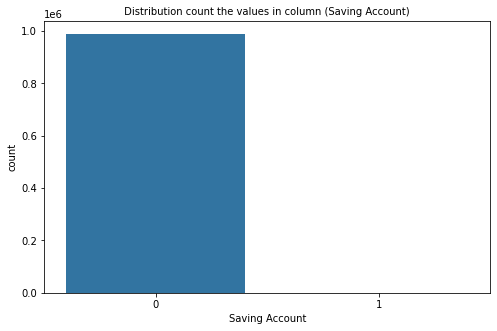

In [151]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Saving Account) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Saving Account"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Saving Account.
2. No Missing values.
3. Rename column name from ind_ahor_fin_ult1 to Saving Account

<h4> Handling column ind_aval_fin_ult1</h4>

In [152]:
# Show the unique values
# Description the column:Guarantees
df['ind_aval_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [153]:
# Count the null values

df['ind_aval_fin_ult1'].isna().sum()

0

In [154]:
# Rename the column name

df.rename(columns = {'ind_aval_fin_ult1':'Guarantees'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


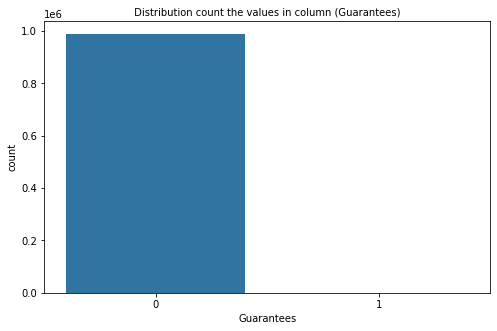

In [155]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Guarantees) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Guarantees"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Guarantees.
2. No Missing values.
3. Rename column name from ind_aval_fin_ult1 to Guarantees

<h4> Handling column ind_cco_fin_ult1 </h4>

In [156]:
# Show the unique values
# Description the column:Current Accounts
df['ind_cco_fin_ult1'].unique()

array([1, 0], dtype=int64)

In [157]:
df['ind_cco_fin_ult1'].isna().sum()

0

In [158]:
# Rename the column name

df.rename(columns = {'ind_cco_fin_ult1':'Current Accounts'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


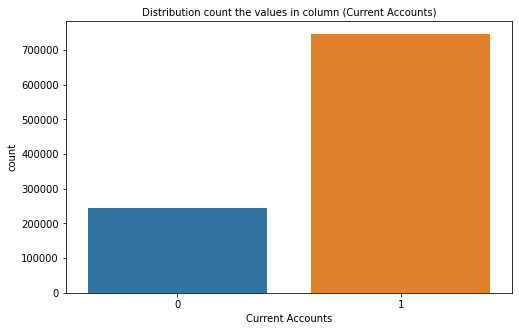

In [159]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Current Accounts) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Current Accounts"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Current Accounts.
2. No Missing values.
3. Rename column name from ind_cco_fin_ult1 to Current Accounts

<h4> Handling column ind_cder_fin_ult1 </h4>

In [160]:
# Show the unique values
# Description the column:Derivada Account
df['ind_cder_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [161]:
df['ind_cder_fin_ult1'].isna().sum()

0

In [162]:
# Rename the column name

df.rename(columns = {'ind_cder_fin_ult1':'Derivada Account'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


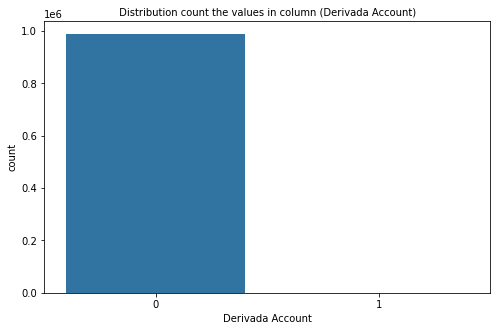

In [163]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Derivada Account) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Derivada Account"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Derivada Account.
2. No Missing values.
3. Rename column name from ind_cder_fin_ult1 to Derivada Account.

<h4> Handling column ind_cno_fin_ult1 </h4>

In [164]:
# Show the unique values
# Description the column:Payroll Account 
df['ind_cno_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [165]:
df['ind_cno_fin_ult1'].isna().sum()

0

In [166]:
# Rename the column name

df.rename(columns = {'ind_cno_fin_ult1':'Payroll Account'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


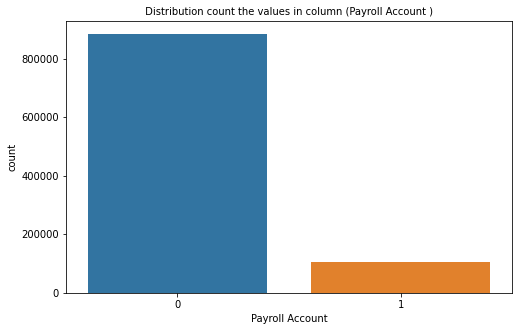

In [167]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Payroll Account ) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Payroll Account"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Payroll Account.
2. No Missing values.
3. Rename column name from ind_cno_fin_ult1 to Payroll Account.

<h4> Handling column  ind_ctju_fin_ult1 </h4>

In [168]:
# Show the unique values
# Description the column:Junior Account
df['ind_ctju_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [169]:
df['ind_ctju_fin_ult1'].isna().sum()

0

In [170]:
# Rename the column name

df.rename(columns = {'ind_ctju_fin_ult1':'Junior Account'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


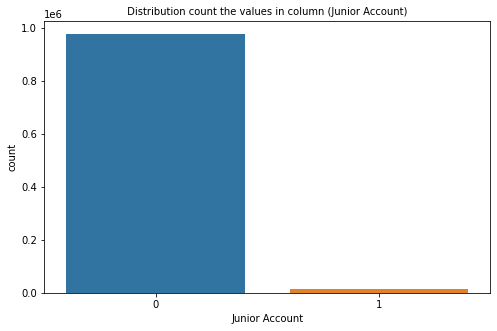

In [171]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Junior Account) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Junior Account"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Junior Account .
2. No Missing values.
3. Rename column name from ind_ctju_fin_ult1 to Junior Account .

<h4> Handling column ind_ctma_fin_ult1 </h4>

In [172]:
# Show the unique values
# Description the column: More Particular Account
df['ind_ctma_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [173]:
df['ind_ctma_fin_ult1'].isna().sum()

0

In [174]:
# Rename the column name

df.rename(columns = {'ind_ctma_fin_ult1':'More Particular Account'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


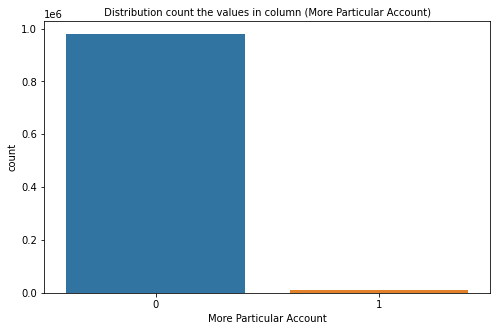

In [175]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (More Particular Account) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["More Particular Account"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: More Particular Account  .
2. No Missing values.
3. Rename column name from ind_ctma_fin_ult1 to More Particular Account .

<h4> Handling column ind_ctop_fin_ult1 </h4>

In [176]:
# Show the unique values
# Description the column: Particular Account 
df['ind_ctop_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [177]:
df['ind_ctop_fin_ult1'].isna().sum()

0

In [178]:
# Rename the column name

df.rename(columns = {'ind_ctop_fin_ult1':'Particular Account'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


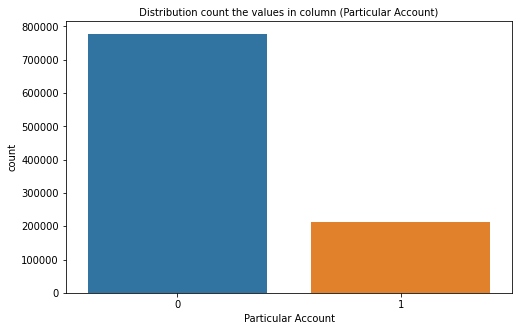

In [179]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Particular Account) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Particular Account"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Particular Account  .
2. No Missing values.
3. Rename column name from ind_ctop_fin_ult1 to  Particular Account.

<h4> Handling column ind_ctpp_fin_ult1 </h4>

In [180]:
# Show the unique values
# Description the column: particular Plus Account
df['ind_ctpp_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [181]:
# Count the null values

df['ind_ctpp_fin_ult1'].isna().sum()

0

In [182]:
# Rename the column name

df.rename(columns = {'ind_ctpp_fin_ult1':'Particular Plus Account'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


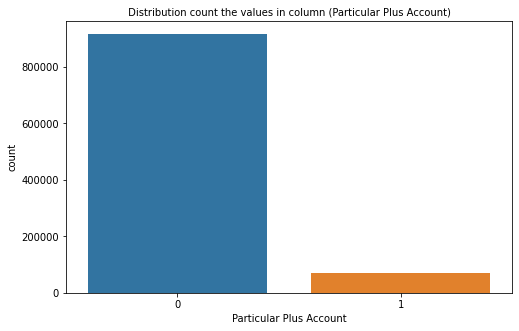

In [183]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Particular Plus Account) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Particular Plus Account"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Particular Plus Account  .
2. No Missing values.
3. Rename column name from ind_ctpp_fin_ult1 to Particular Plus Account .

<h4> Handling column ind_deco_fin_ult1 </h4>

In [184]:
# Show the unique values
# Description the column: Short-term deposits
df['ind_deco_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [185]:
# Count the null values

df['ind_deco_fin_ult1'].isna().sum()

0

In [186]:
# Rename the column name

df.rename(columns = {'ind_deco_fin_ult1':'Short-term Deposits'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


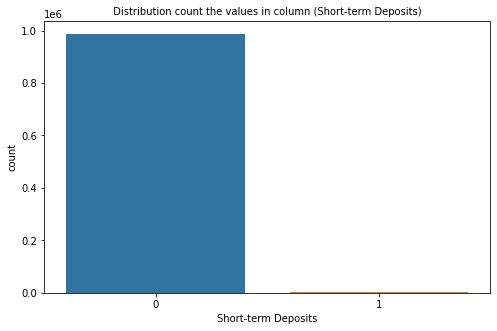

In [187]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Short-term Deposits) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Short-term Deposits"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Short-term Deposits .
2. No Missing values.
3. Rename column name from ind_deco_fin_ult1 to Short-term Deposits .

<h5> Summary </h5>

<h4> Handling column ind_deme_fin_ult1 </h4>

In [188]:
# Show the unique values
# Description the column: Medium-term Deposits
df['ind_deme_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [189]:
# Count the null values

df['ind_deme_fin_ult1'].isna().sum()

0

In [190]:
# Rename the column name

df.rename(columns = {'ind_deme_fin_ult1':'Medium-term Deposits'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


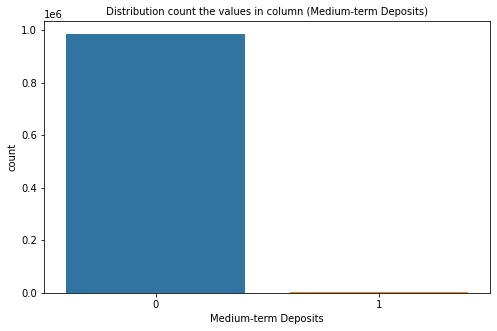

In [191]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Medium-term Deposits) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Medium-term Deposits"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Medium-term Deposits .
2. No Missing values.
3. Rename column name from ind_deme_fin_ult1 to Medium-term Deposits .

<h4> Handling column ind_dela_fin_ult1  </h4>

In [192]:
# Show the unique values
# Description the column: Long-term Deposits
df['ind_dela_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [193]:
# Count the null values

df['ind_dela_fin_ult1'].isna().sum()

0

In [194]:
# Rename the column name

df.rename(columns = {'ind_dela_fin_ult1':'Long-term Deposits'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


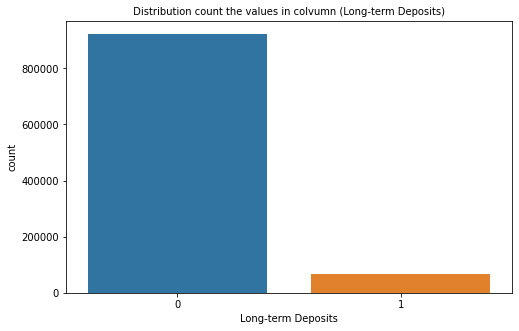

In [195]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in colvumn (Long-term Deposits) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Long-term Deposits"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Long-term Deposits .
2. No Missing values.
3. Rename column name from ind_dela_fin_ult1  to Long-term Deposits  .

<h4> Handling column ind_ecue_fin_ult1 </h4>

In [196]:
# Show the unique values
# Description the column: E-account
df['ind_ecue_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [197]:
# Count the null values

df['ind_ecue_fin_ult1'].isna().sum()

0

In [198]:
# Rename the column name

df.rename(columns = {'ind_ecue_fin_ult1':'E-account'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


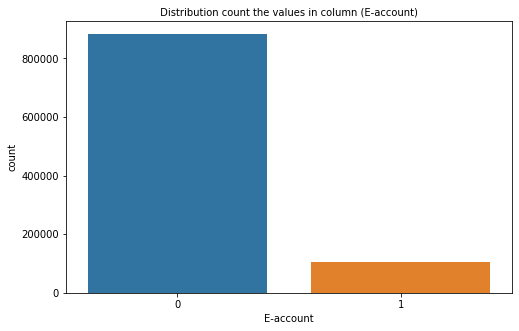

In [199]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (E-account) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["E-account"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: E-account.
2. No Missing values.
3. Rename column name from ind_ecue_fin_ult1 to E-account .

<h4> Handling column ind_fond_fin_ult1 </h4>

In [200]:
# Show the unique values
# Description the column: Funds
df['ind_fond_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [201]:
# Count the null values

df['ind_fond_fin_ult1'].isna().sum()

0

In [202]:
# Rename the column name

df.rename(columns = {'ind_fond_fin_ult1':'Funds'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


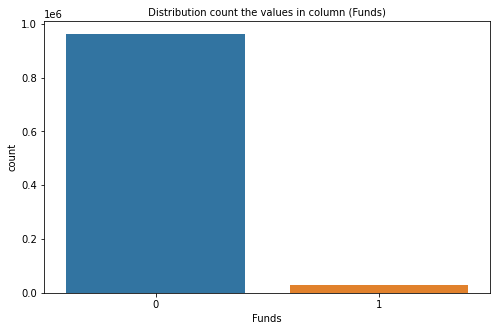

In [203]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Funds) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Funds"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Funds .
2. No Missing values.
3. Rename column name from ind_fond_fin_ult1 to Funds.

<h4> Handling column ind_hip_fin_ult1 </h4>

In [204]:
# Show the unique values
# Description the column: Mortgage
df['ind_hip_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [205]:
# Count the null values

df['ind_hip_fin_ult1'].isna().sum()

0

In [206]:
# Rename the column name

df.rename(columns = {'ind_hip_fin_ult1':'Mortgage'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


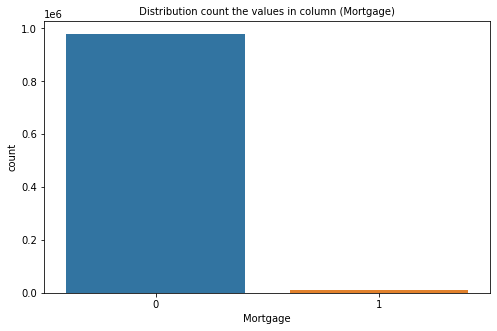

In [207]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Mortgage) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Mortgage"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Mortgage .
2. No Missing values.
3. Rename column name from ind_hip_fin_ult1 to Mortgage .

<h4> Handling column ind_plan_fin_ult1 </h4>

In [208]:
# Show the unique values
# Description the column: Pensions
df['ind_plan_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [209]:
df['ind_plan_fin_ult1'].isna().sum()

0

In [210]:
# Rename the column name

df.rename(columns = {'ind_plan_fin_ult1':'Pensions'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


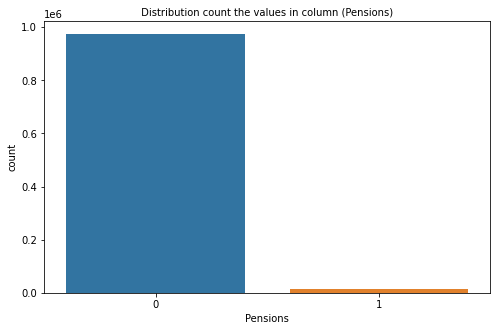

In [211]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Pensions) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Pensions"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Pensions  .
2. No Missing values.
3. Rename column name from  to Pensions .

<h4> Handling column ind_pres_fin_ult1 </h4>

In [212]:
# Show the unique values
# Description the column: Loans
df['ind_pres_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [213]:
# Count the null values

df['ind_pres_fin_ult1'].isna().sum()

0

In [214]:
# Rename the column name

df.rename(columns = {'ind_pres_fin_ult1':'Loans'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


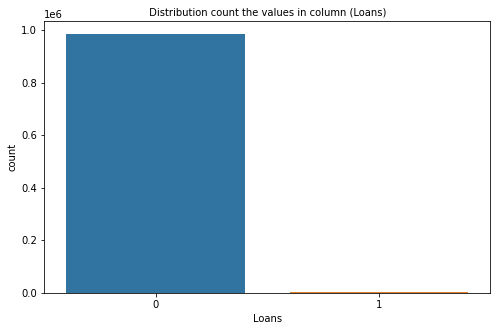

In [215]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Loans) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Loans"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Loans  .
2. No Missing values.
3. Rename column name from ind_pres_fin_ult1 to Loans .

<h4> Handling column ind_reca_fin_ult1 </h4>

In [216]:
# Show the unique values
# Description the column: Taxes
df['ind_reca_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [217]:
# Count the null values

df['ind_reca_fin_ult1'].isna().sum()

0

In [218]:
# Rename the column name

df.rename(columns = {'ind_reca_fin_ult1':'Taxes'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


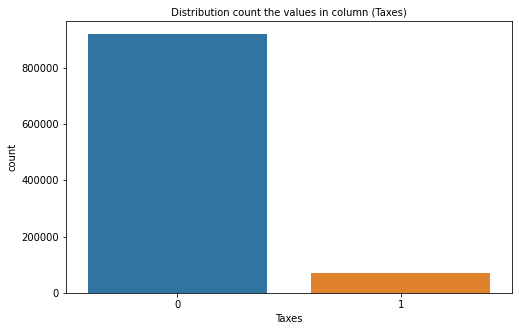

In [219]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Taxes) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Taxes"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Taxes  .
2. No Missing values.
3. Rename column name from ind_reca_fin_ult1 to Taxes .

<h4> Handling column ind_tjcr_fin_ult1  </h4>

In [220]:
# Show the unique values
# Description the column:Credit Card
df['ind_tjcr_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [221]:
# Count the null values

df['ind_tjcr_fin_ult1'].isna().sum()

0

In [222]:
# Rename the column name

df.rename(columns = {'ind_tjcr_fin_ult1':'Credit Card'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


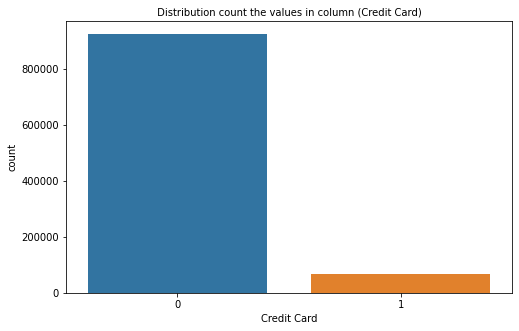

In [223]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Credit Card) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Credit Card"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Credit Card .
2. No Missing values.
3. Rename column name from ind_tjcr_fin_ult1 to Credit Card  .

<h4> Handling column ind_valo_fin_ult1 </h4>

In [224]:
# Show the unique values
# Description the column:Securities
df['ind_valo_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [225]:
# Count the null values

df['ind_valo_fin_ult1'].isna().sum()

0

In [226]:
# Rename the column name

df.rename(columns = {'ind_valo_fin_ult1':'Securities'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


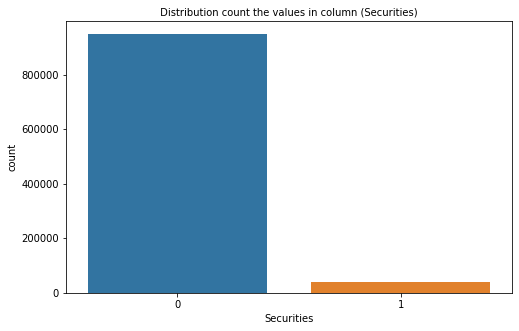

In [227]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Securities) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Securities"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Securities .
2. No Missing values.
3. Rename column name from ind_valo_fin_ult1  to Securities .

<h4> Handling column ind_viv_fin_ult1</h4>

In [228]:
# Show the unique values
# Description the column: Home Account
df['ind_viv_fin_ult1'].unique()

array([0, 1], dtype=int64)

In [229]:
# Count the null values

df['ind_viv_fin_ult1'].isna().sum()

0

In [230]:
# Rename the column name

df.rename(columns = {'ind_viv_fin_ult1':'Home Account'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


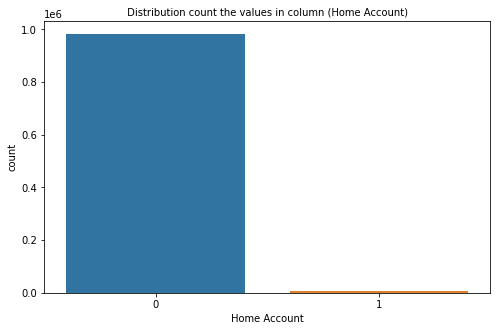

In [231]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Home Account) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Home Account"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Home Account .
2. No Missing values.
3. Rename column name from ind_viv_fin_ult1  to Home Account .

<h4> Handling column ind_nomina_ult1 </h4>

In [232]:
# Show the unique values
# Description the column: Payroll
df['ind_nomina_ult1'].unique()

array([ 0.,  1., nan])

In [233]:
# Count the null values

df['ind_nomina_ult1'].isna().sum()

100

In [234]:
# Handling missing values by mode

df['ind_nomina_ult1'] = df['ind_nomina_ult1'].fillna(df['ind_nomina_ult1'].mode()[0])

In [235]:
# Count the null values after handling

df['ind_nomina_ult1'].isna().sum()

0

In [236]:
# Rename the column name

df.rename(columns = {'ind_nomina_ult1':'Payroll'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


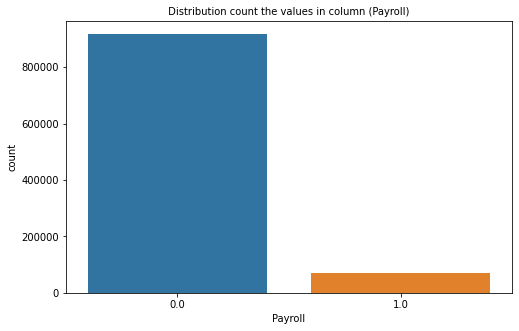

In [237]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Payroll) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Payroll"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Payroll .
2. Handling Missing values by mode.
3. Rename column name from ind_nomina_ult1 to Payroll .

<h4> Handling column ind_nom_pens_ult1 </h4>

In [238]:
# Show the unique values
# Description the column: Pensions
df['ind_nom_pens_ult1'].unique()

array([ 0.,  1., nan])

In [239]:
# Count the null values

df['ind_nom_pens_ult1'].isna().sum()

100

In [240]:
# Handling missing values by mode

df['ind_nom_pens_ult1'] = df['ind_nom_pens_ult1'].fillna(df['ind_nom_pens_ult1'].mode()[0])

In [241]:
# Count the null values after handling

df['ind_nom_pens_ult1'].isna().sum()

0

In [242]:
# Rename the column name

df.rename(columns = {'ind_nom_pens_ult1':'Nom Pensions'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


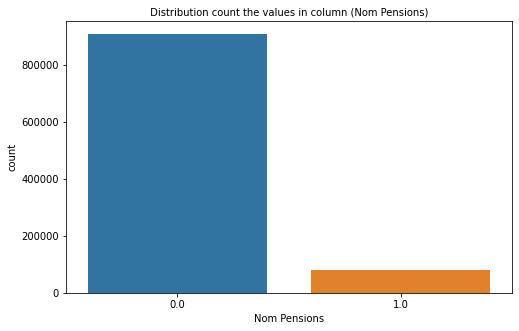

In [243]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Nom Pensions) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Nom Pensions"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Nom Pensions  .
2. No Missing values.
3. Rename column name from ind_nom_pens_ult1 to Nom Pensions  .

<h4> Handling column  ind_recibo_ult1</h4>

In [244]:
# Show the unique values
# Description the column: Direct Debit

df['ind_recibo_ult1'].unique()

array([0, 1], dtype=int64)

In [245]:
# Count the null values

df['ind_recibo_ult1'].isna().sum()

0

In [246]:
# Rename the column name

df.rename(columns = {'ind_recibo_ult1':'Direct Debit'}, inplace = True)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


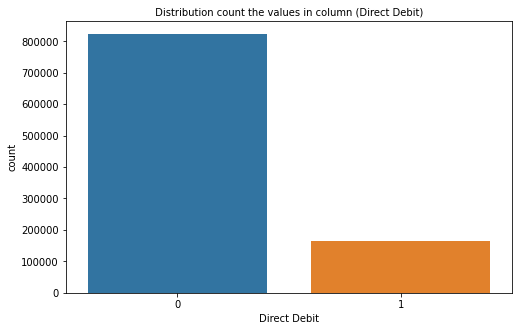

In [247]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution count the values in column (Direct Debit) ", loc="center",fontsize='10')

# Plot
sns.countplot(df["Direct Debit"])


# Figure show
plt.show();

<h5> Summary </h5>

1. Description of the column: Direct Debit  .
2. No Missing values.
3. Rename column name from ind_recibo_ult1 to Direct Debit .

<hr>

## 3. EDA

<h3> Check from Missing values</h3>

In [248]:
df.isna().sum()

fecha_dato                 0
Customer Code              0
Employee Index             0
Country residence          0
sex                        0
age                        0
Register Date              0
New customer               0
Customer Seniority         0
indrel                     0
Customer Type              0
Customer Relation Type     0
Residence Index            0
Foreigner Index            0
Channel                    0
Deceased Index             0
Addres Type                0
Province code              0
Province Name              0
Activity Index             0
Gross Income               0
Saving Account             0
Guarantees                 0
Current Accounts           0
Derivada Account           0
Payroll Account            0
Junior Account             0
More Particular Account    0
Particular Account         0
Particular Plus Account    0
Short-term Deposits        0
Medium-term Deposits       0
Long-term Deposits         0
E-account                  0
Funds         

<h3> Check from duplicate rows </h3>

In [249]:
#find duplicate rows across all columns

duplicateRows = df[df.duplicated()]
duplicateRows

,fecha_dato,Customer Code,Employee Index,Country residence,sex,age,Register Date,New customer,Customer Seniority,indrel,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Nom Pensions,Direct Debit


<h5> Summary </h5>

<b>No duplicate rows In the dataset </b>

In [250]:
df.dtypes

fecha_dato                  object
Customer Code                int64
Employee Index              object
Country residence           object
sex                         object
age                         object
Register Date               object
New customer               float64
Customer Seniority          object
indrel                     float64
Customer Type              float64
Customer Relation Type      object
Residence Index             object
Foreigner Index             object
Channel                     object
Deceased Index              object
Addres Type                float64
Province code              float64
Province Name               object
Activity Index             float64
Gross Income               float64
Saving Account               int64
Guarantees                   int64
Current Accounts             int64
Derivada Account             int64
Payroll Account              int64
Junior Account               int64
More Particular Account      int64
Particular Account  

In [251]:
# Convert Data type of data from object to int
df['age'].astype(str).astype(int)

0         35
1         23
2         23
3         22
4         23
          ..
999995    27
999996    56
999997    39
999998    36
999999    38
Name: age, Length: 989218, dtype: int32

In [252]:
# Convert some columns from float to int64 datatypes and Object to Category to work with appropriate ones.

for column in [ "New customer","indrel","Customer Type" , "Province code","Activity Index","Gross Income",
               "Payroll","Nom Pensions","age","Customer Seniority"] :
    
        df[column] = df[column].astype(np.int64)
        

for columns in ["fecha_dato","Employee Index","Country residence","sex","Register Date","Customer Relation Type",
                "Residence Index","Foreigner Index","Channel","Deceased Index","Province Name"]:
    
    df[columns] = df[columns].astype('category')
        
print("\n New Feature's datatypes \n{}".format(df.dtypes))



 New Feature's datatypes 
fecha_dato                 category
Customer Code                 int64
Employee Index             category
Country residence          category
sex                        category
age                           int64
Register Date              category
New customer                  int64
Customer Seniority            int64
indrel                        int64
Customer Type                 int64
Customer Relation Type     category
Residence Index            category
Foreigner Index            category
Channel                    category
Deceased Index             category
Addres Type                 float64
Province code                 int64
Province Name              category
Activity Index                int64
Gross Income                  int64
Saving Account                int64
Guarantees                    int64
Current Accounts              int64
Derivada Account              int64
Payroll Account               int64
Junior Account                int64
M

<h3>  Detect Outliers</h3>

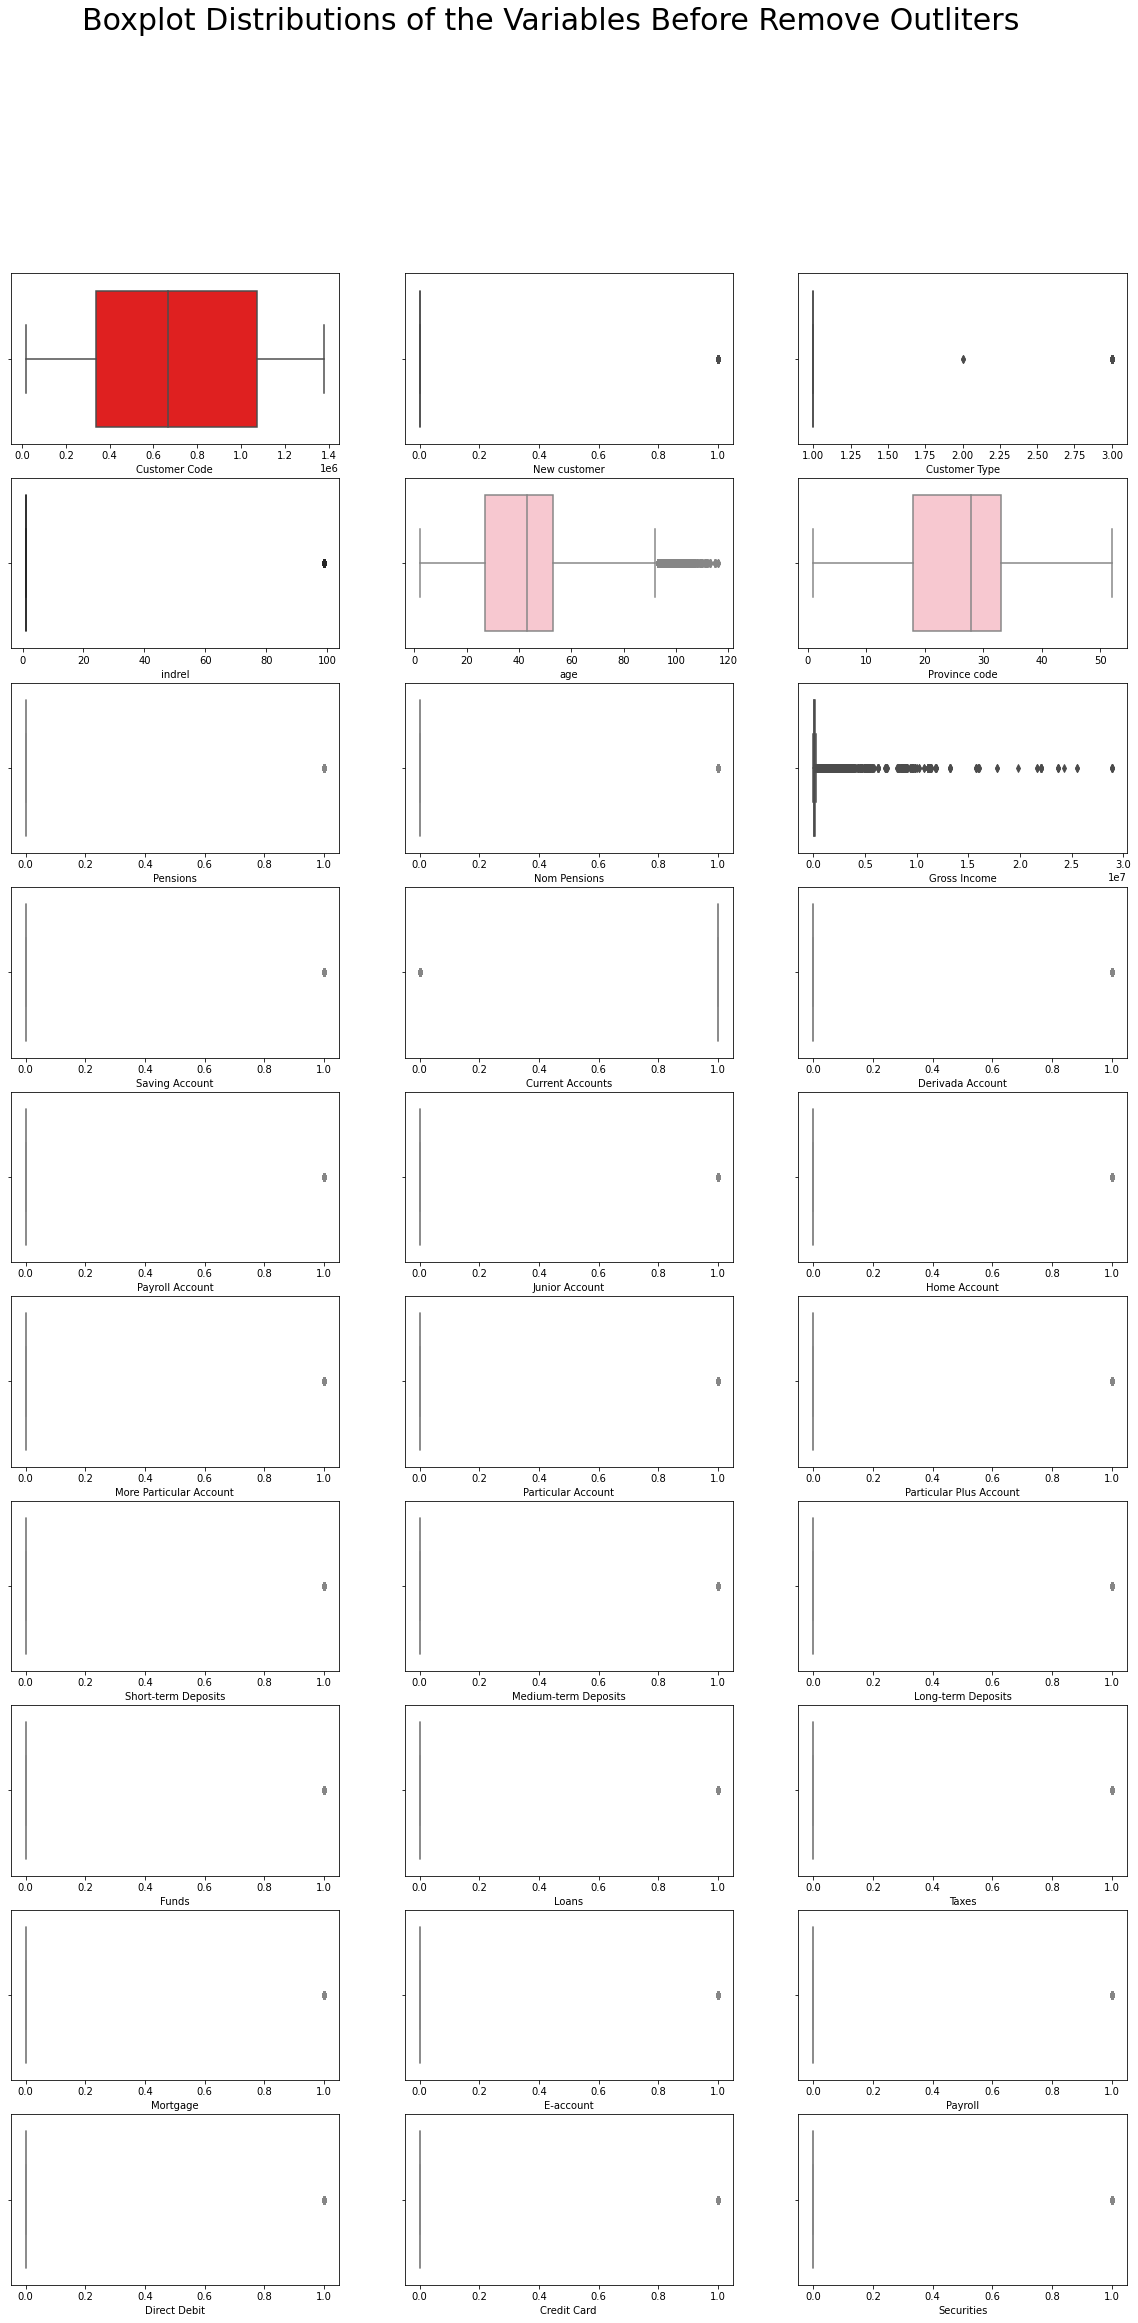

In [253]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(10,3,figsize=(20, 37), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables Before Remove Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='Customer Code',color='red', data= df)
sns.boxplot(ax=axes[0,1], x='New customer',color='yellow'  , data= df) 
sns.boxplot(ax=axes[0,2], x='Customer Type' , color='orange' , data= df)

sns.boxplot(ax=axes[1,0], x='indrel' , color='green' ,   data= df)
sns.boxplot(ax=axes[1,1], x='age' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[1,2], x='Province code' ,color='pink' ,   data= df)


sns.boxplot(ax=axes[2,0], x='Pensions' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[2,1], x='Nom Pensions' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[2,2], x='Gross Income' ,color='orange' ,   data= df)

sns.boxplot(ax=axes[3,0], x='Saving Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[3,1], x='Current Accounts' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[3,2], x='Derivada Account' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[4,0], x='Payroll Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[4,1], x='Junior Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[4,2], x='Home Account' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[5,0], x='More Particular Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[5,1], x='Particular Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[5,2], x='Particular Plus Account' ,color='pink' ,   data= df)


sns.boxplot(ax=axes[6,0], x='Short-term Deposits' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[6,1], x='Medium-term Deposits' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[6,2], x='Long-term Deposits' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[7,0], x='Funds' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[7,1], x='Loans' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[7,2], x='Taxes' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[8,0], x='Mortgage' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[8,1], x='E-account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[8,2], x='Payroll' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[9,0], x='Direct Debit' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[9,1], x='Credit Card' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[9,2], x='Securities' ,color='pink' ,   data= df);


In [254]:
cols = ['Customer Code', 'New customer', 'Customer Type', 'indrel' ,'age' ,'Province code',
        'Pensions' ,'Nom Pensions' ,'Gross Income' ,'Saving Account','Current Accounts' ,
        'Derivada Account', 'Payroll Account','Junior Account','Home Account' ,
        'More Particular Account','Particular Account' ,'Particular Plus Account',
        'Short-term Deposits' ,'Medium-term Deposits','Long-term Deposits' ,'Funds' ,'Loans' ,
        'Taxes' ,'Mortgage','E-account','Payroll','Direct Debit' ,'Credit Card' ,'Securities'] 
# The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

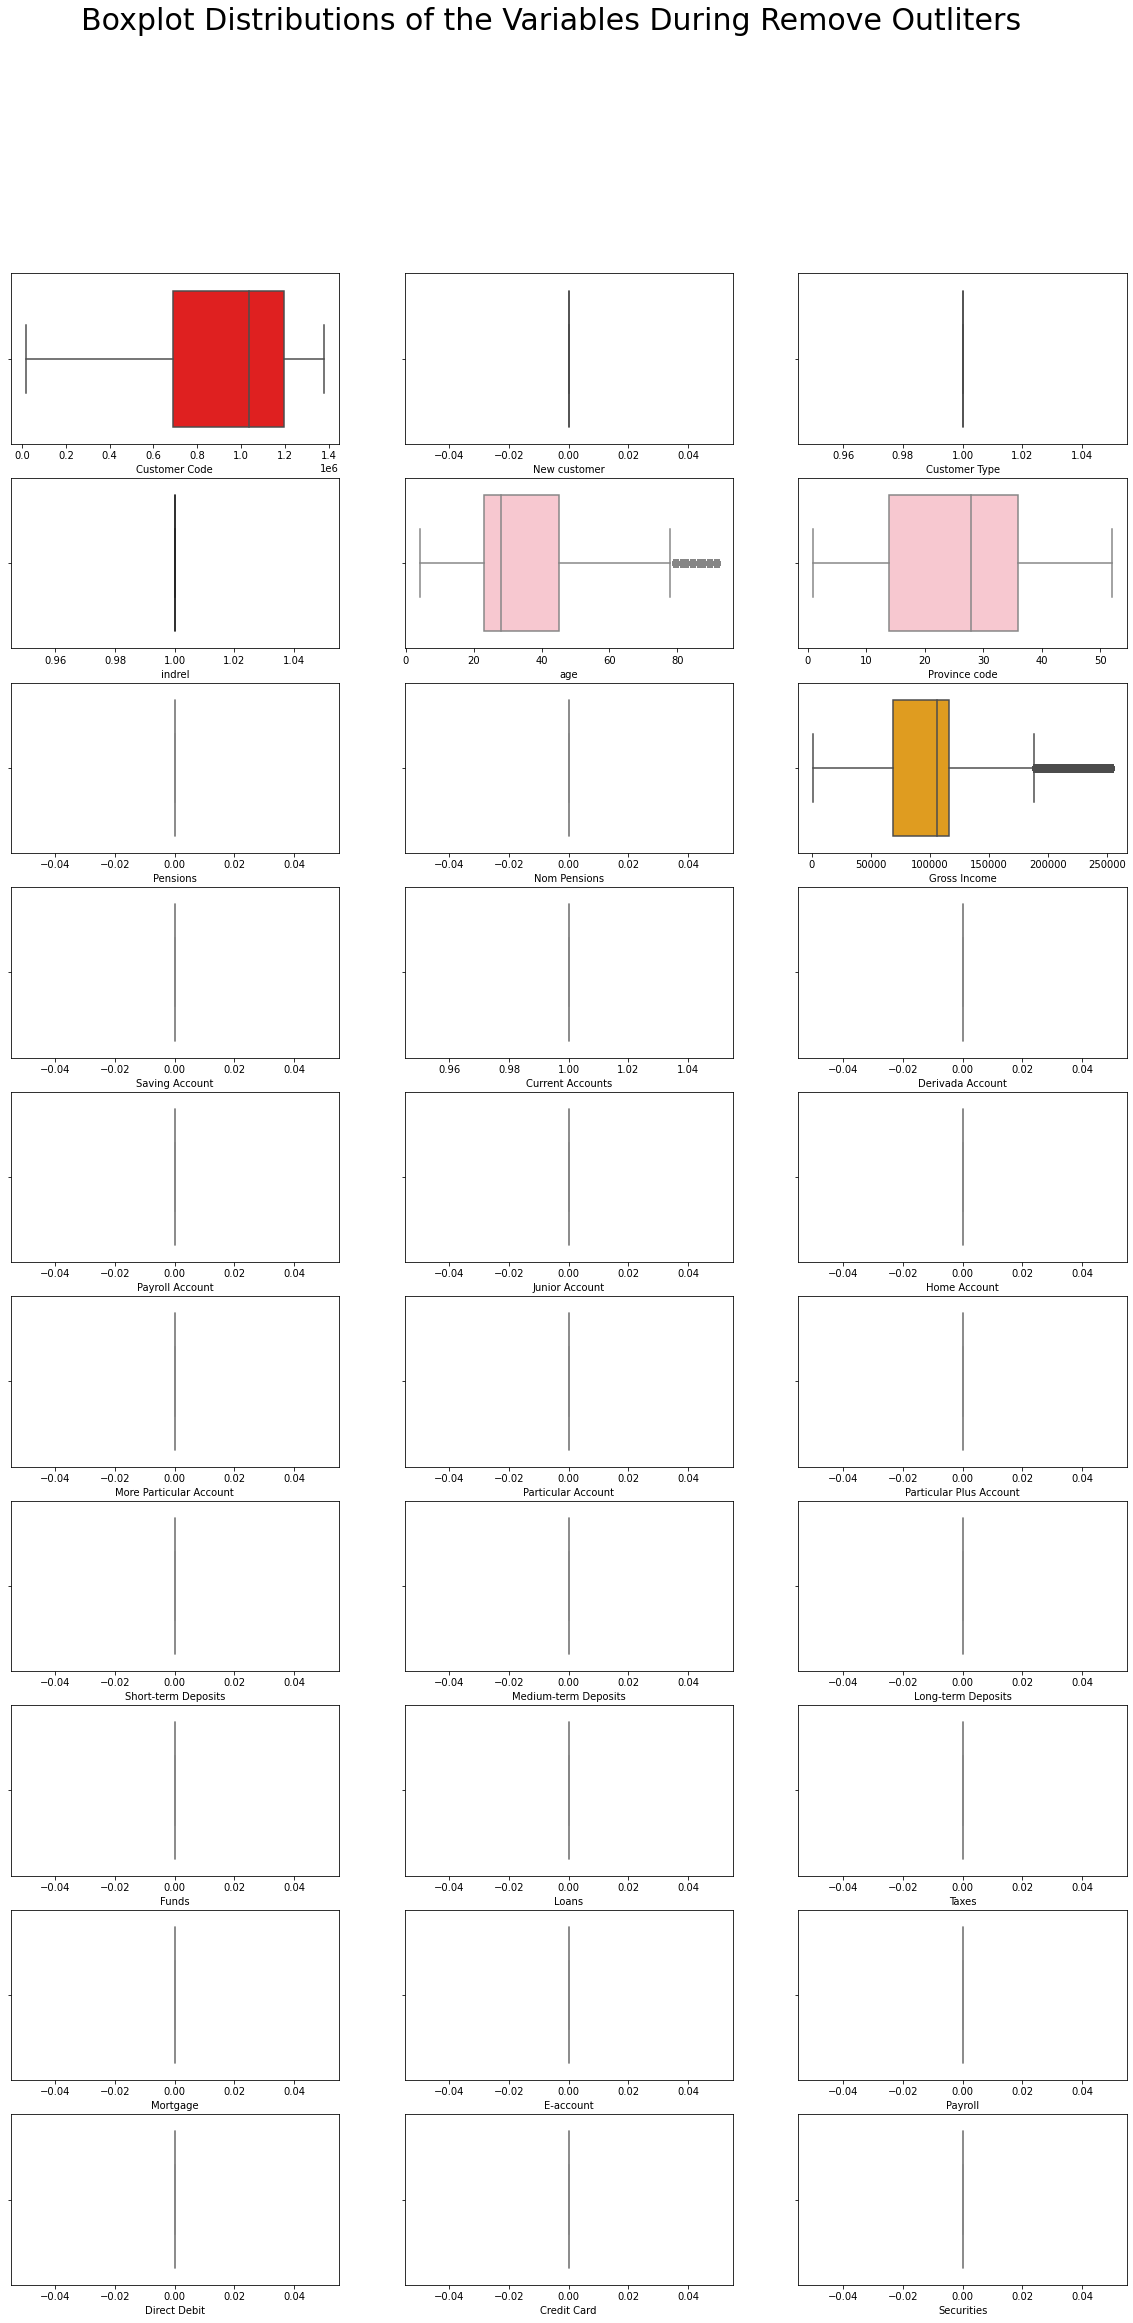

In [255]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(10,3,figsize=(20, 37), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Remove Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='Customer Code',color='red', data= df)
sns.boxplot(ax=axes[0,1], x='New customer',color='yellow'  , data= df) 
sns.boxplot(ax=axes[0,2], x='Customer Type' , color='orange' , data= df)

sns.boxplot(ax=axes[1,0], x='indrel' , color='green' ,   data= df)
sns.boxplot(ax=axes[1,1], x='age' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[1,2], x='Province code' ,color='pink' ,   data= df)


sns.boxplot(ax=axes[2,0], x='Pensions' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[2,1], x='Nom Pensions' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[2,2], x='Gross Income' ,color='orange' ,   data= df)

sns.boxplot(ax=axes[3,0], x='Saving Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[3,1], x='Current Accounts' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[3,2], x='Derivada Account' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[4,0], x='Payroll Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[4,1], x='Junior Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[4,2], x='Home Account' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[5,0], x='More Particular Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[5,1], x='Particular Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[5,2], x='Particular Plus Account' ,color='pink' ,   data= df)


sns.boxplot(ax=axes[6,0], x='Short-term Deposits' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[6,1], x='Medium-term Deposits' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[6,2], x='Long-term Deposits' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[7,0], x='Funds' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[7,1], x='Loans' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[7,2], x='Taxes' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[8,0], x='Mortgage' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[8,1], x='E-account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[8,2], x='Payroll' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[9,0], x='Direct Debit' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[9,1], x='Credit Card' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[9,2], x='Securities' ,color='pink' ,   data= df);


In [260]:
cols = ['age'] 
# The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

In [261]:
cols = ['Gross Income'] 
# The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

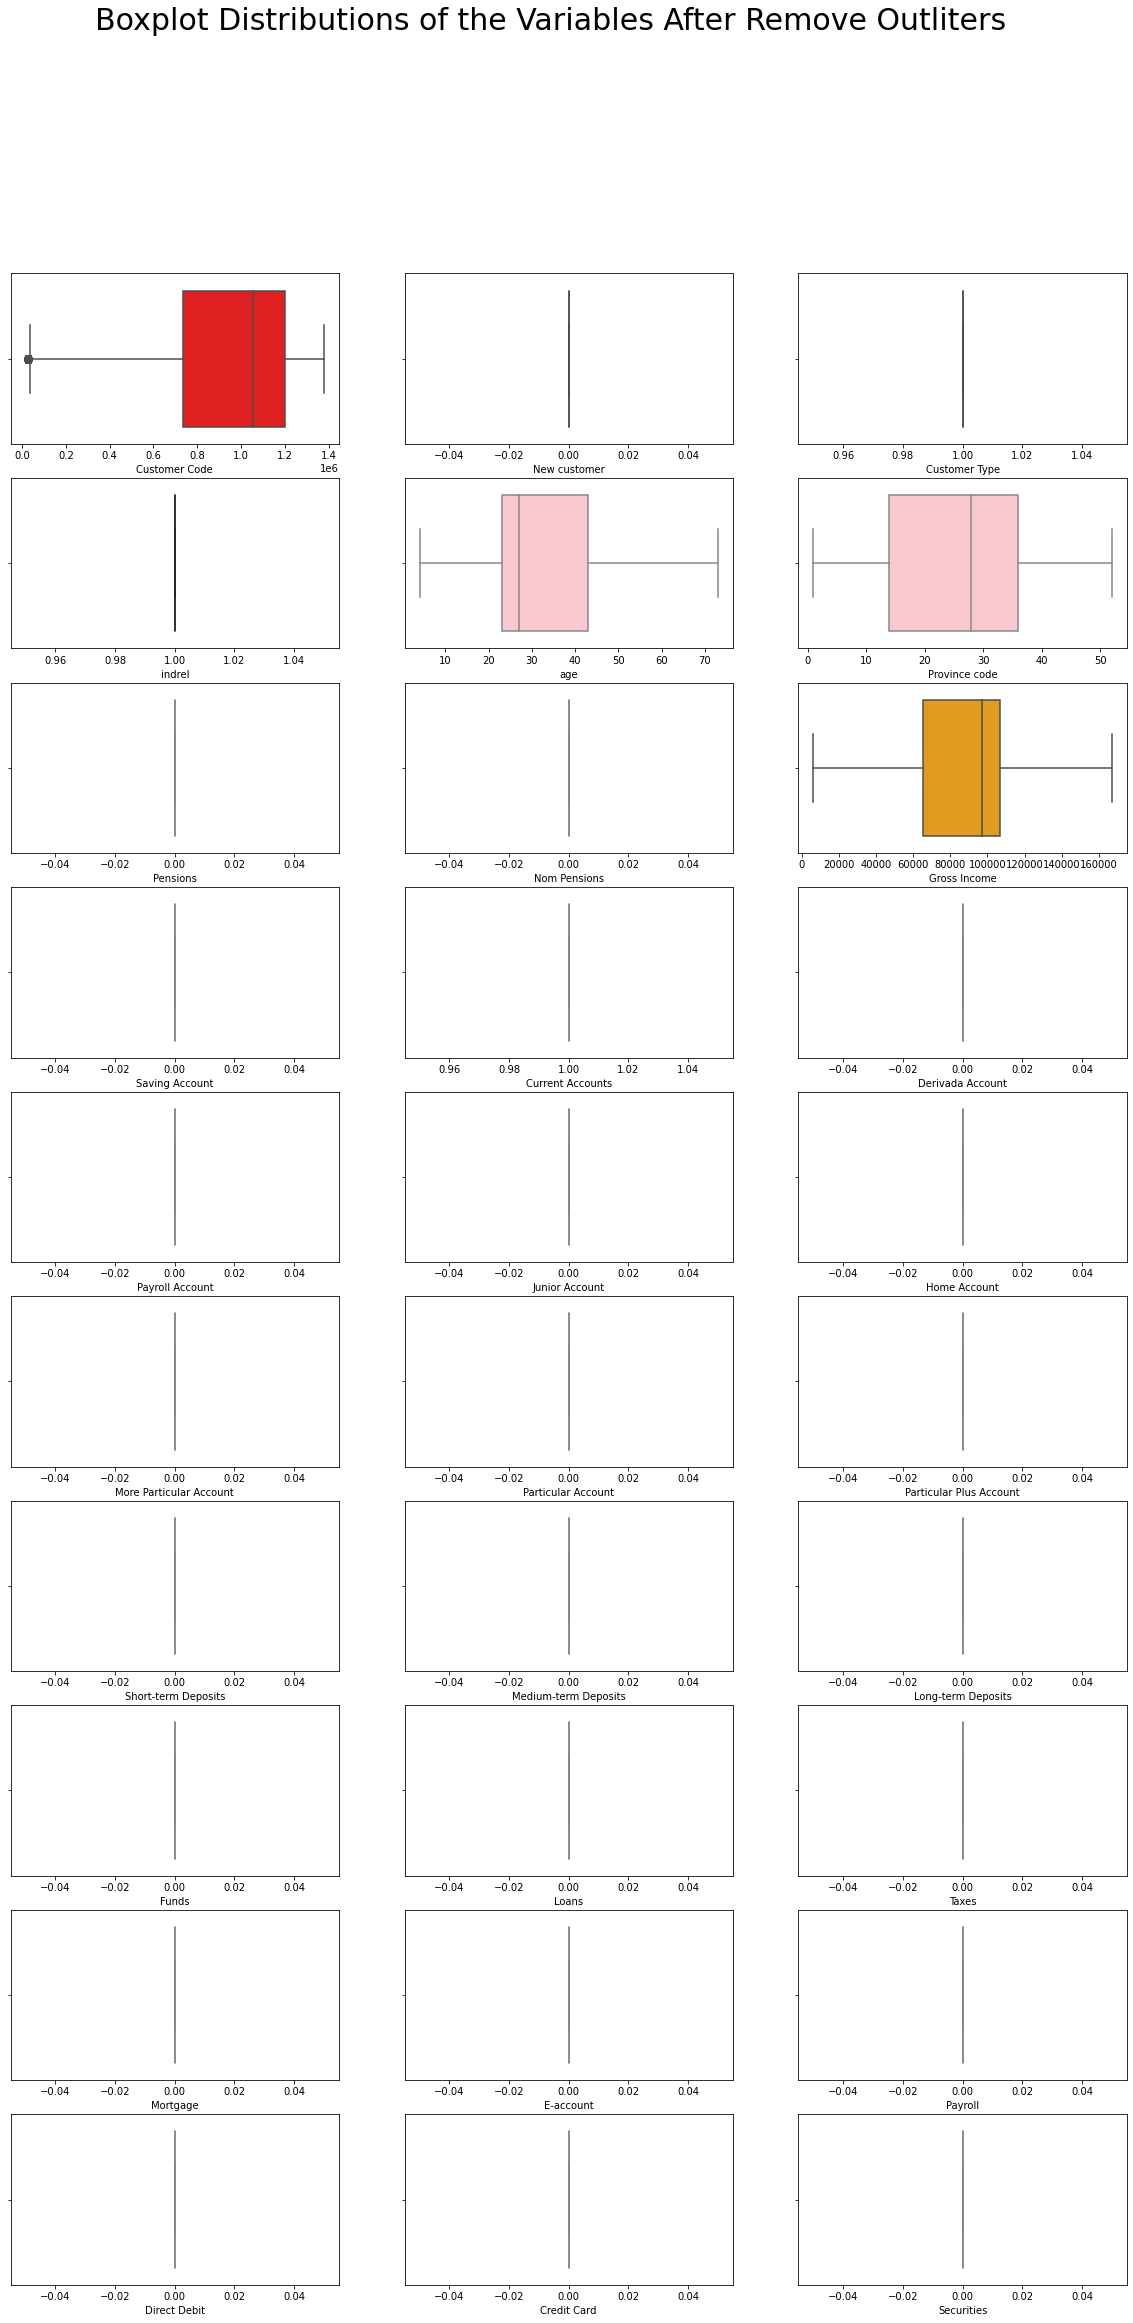

In [262]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(10,3,figsize=(20, 37), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables After Remove Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='Customer Code',color='red', data= df)
sns.boxplot(ax=axes[0,1], x='New customer',color='yellow'  , data= df) 
sns.boxplot(ax=axes[0,2], x='Customer Type' , color='orange' , data= df)

sns.boxplot(ax=axes[1,0], x='indrel' , color='green' ,   data= df)
sns.boxplot(ax=axes[1,1], x='age' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[1,2], x='Province code' ,color='pink' ,   data= df)


sns.boxplot(ax=axes[2,0], x='Pensions' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[2,1], x='Nom Pensions' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[2,2], x='Gross Income' ,color='orange' ,   data= df)

sns.boxplot(ax=axes[3,0], x='Saving Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[3,1], x='Current Accounts' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[3,2], x='Derivada Account' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[4,0], x='Payroll Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[4,1], x='Junior Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[4,2], x='Home Account' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[5,0], x='More Particular Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[5,1], x='Particular Account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[5,2], x='Particular Plus Account' ,color='pink' ,   data= df)


sns.boxplot(ax=axes[6,0], x='Short-term Deposits' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[6,1], x='Medium-term Deposits' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[6,2], x='Long-term Deposits' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[7,0], x='Funds' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[7,1], x='Loans' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[7,2], x='Taxes' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[8,0], x='Mortgage' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[8,1], x='E-account' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[8,2], x='Payroll' ,color='pink' ,   data= df)

sns.boxplot(ax=axes[9,0], x='Direct Debit' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[9,1], x='Credit Card' ,color='pink' ,   data= df)
sns.boxplot(ax=axes[9,2], x='Securities' ,color='pink' ,   data= df);

<h3> Univariate Analysis </h3>

- In Univariate Analysis, you analyze data of just one variable.
- A variable in your dataset refers to a single feature/ column.
- Use Histograms or Box-plots.

<h4>Distribution (age) </h4>

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


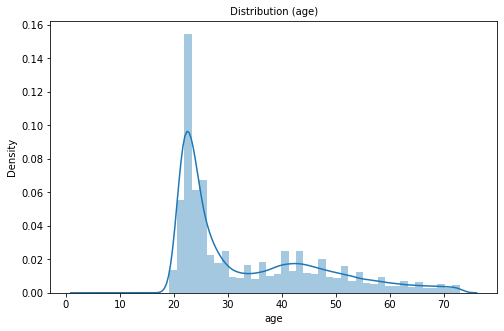

In [263]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution (age) ", loc="center",fontsize='10')

# Plot
sns.distplot(df['age'])


# Figure show
plt.show();

<h4>Distribution (Customer Code) </h4>

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


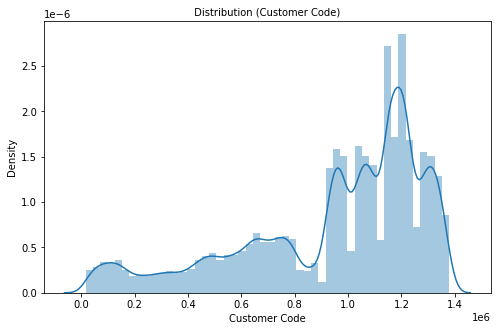

In [264]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution (Customer Code) ", loc="center",fontsize='10')

# Plot
sns.distplot(df['Customer Code']);


# Figure show
plt.show();

<h4>Distribution (sex) </h4>

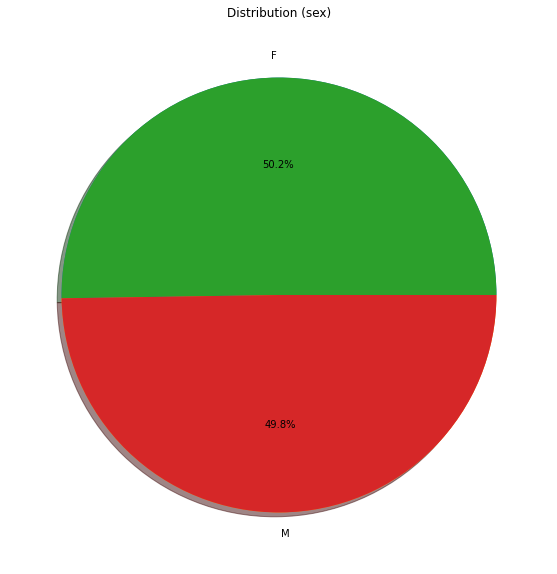

In [265]:
series = df['sex'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(10,10))

plt.pie(values) 

# Figure title
plt.title('Distribution (sex)')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

<h4>Distribution (fecha_dato) </h4>

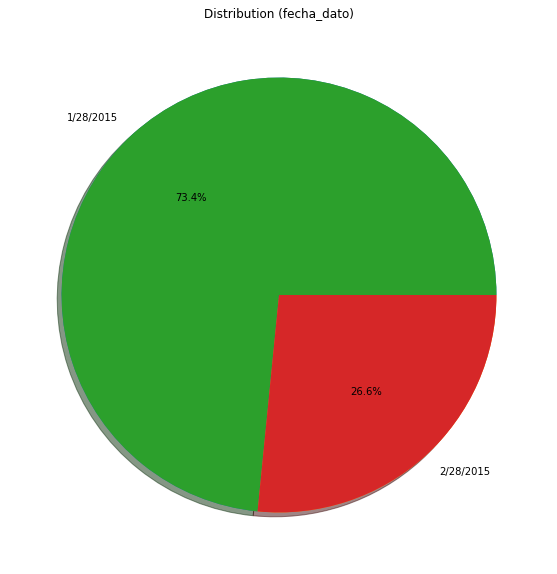

In [266]:
series = df['fecha_dato'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(10,10))

plt.pie(values) 

# Figure title
plt.title('Distribution (fecha_dato)')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

<h4>Distribution (Customer Type) </h4>

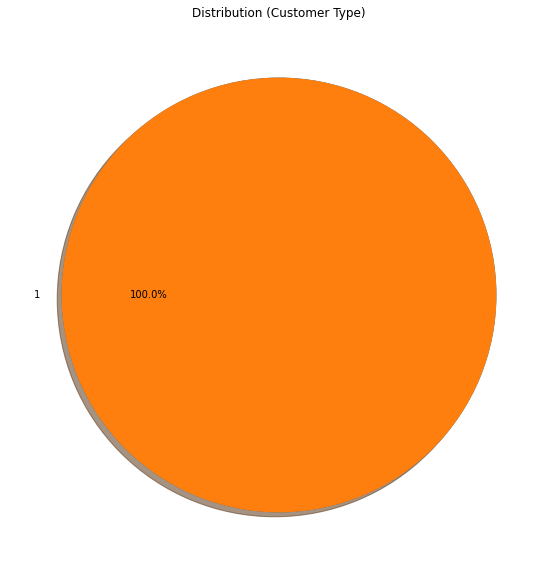

In [267]:
series = df['Customer Type'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(10,10))

plt.pie(values) 

# Figure title
plt.title('Distribution (Customer Type)')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

<h4>Distribution (Province code) </h4>

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


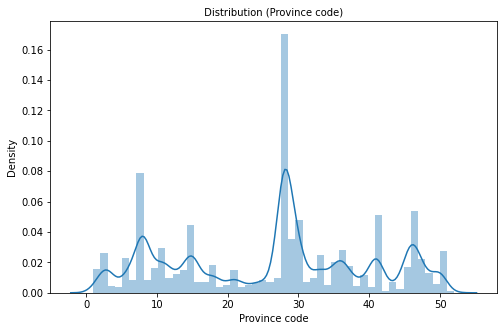

In [268]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution (Province code) ", loc="center",fontsize='10')

# Plot
sns.distplot(df['Province code']);


# Figure show
plt.show();

<h4>Distribution (Employee Index) </h4>

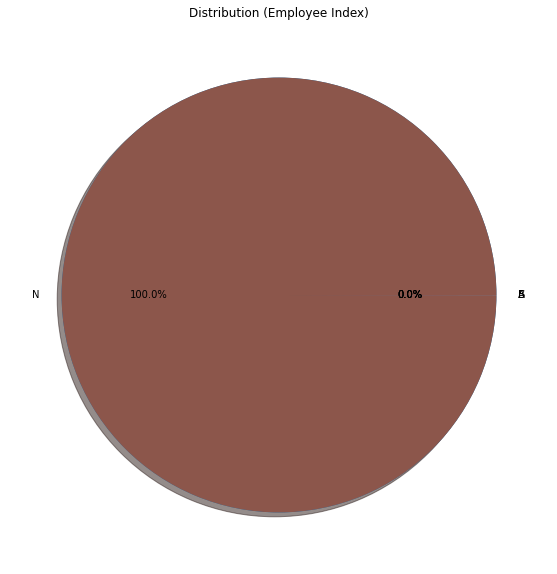

In [269]:
series = df['Employee Index'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(10,10))

plt.pie(values) 

# Figure title
plt.title('Distribution (Employee Index)')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

<h4>Distribution (Customer Seniority) </h4>

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


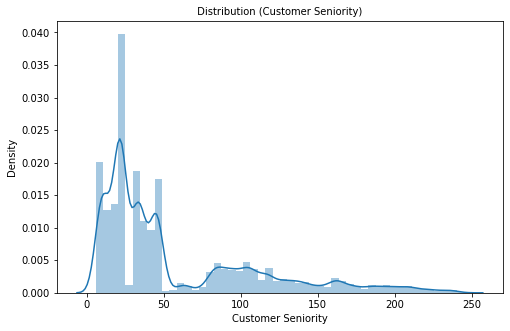

In [270]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution (Customer Seniority) ", loc="center",fontsize='10')

# Plot
sns.distplot(df['Customer Seniority']);


# Figure show
plt.show();

<h4>Distribution (Customer Relation Type) </h4>

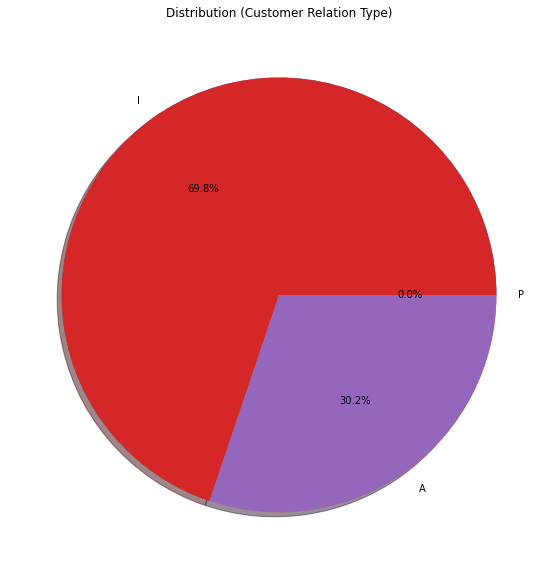

In [271]:
series = df['Customer Relation Type'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(10,10))

plt.pie(values) 

# Figure title
plt.title('Distribution (Customer Relation Type)')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

<h4>Distribution (Residence Index) </h4>

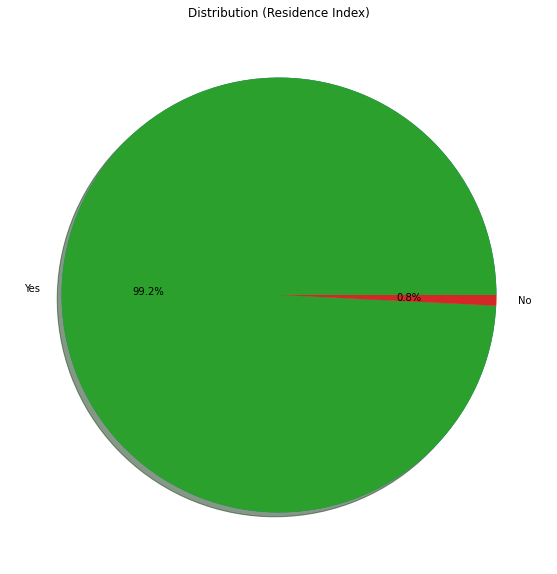

In [272]:
series = df['Residence Index'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(10,10))

plt.pie(values) 

# Figure title
plt.title('Distribution (Residence Index)')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

<h4>Distribution (Deceased Index) </h4>

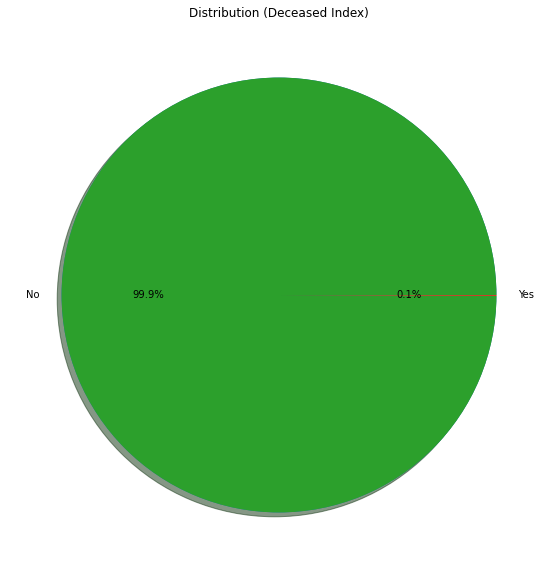

In [273]:
series = df['Deceased Index'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(10,10))

plt.pie(values) 

# Figure title
plt.title('Distribution (Deceased Index)')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

<h3> Distribution (Gross Income) </h3>

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


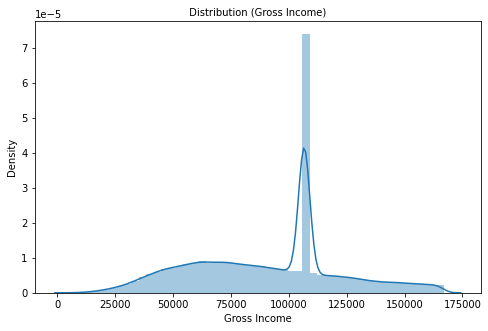

In [274]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution (Gross Income) ", loc="center",fontsize='10')

# Plot
sns.distplot(df['Gross Income']);

# Figure show
plt.show();

<h3> Distribution (Foreigner Index) </h3>

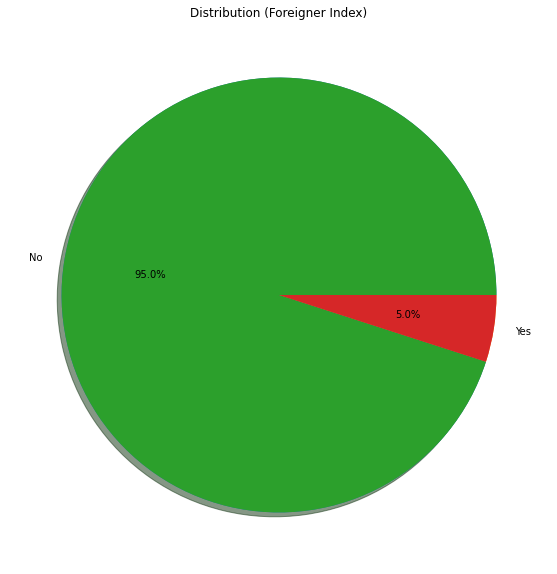

In [275]:
series = df['Foreigner Index'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(10,10))

plt.pie(values) 

# Figure title
plt.title('Distribution (Foreigner Index)')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

<h3> Bivariate Analysis </h3>

- Numeric-Numeric Analysis.
- Numeric - Categorical Analysis.
- Categorical - Categorical Analysis.

<h3> Distribution Age of Customers of Bank </h3>

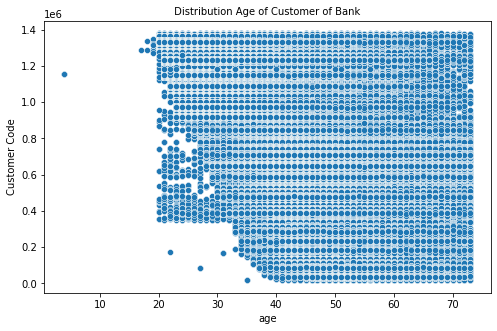

In [276]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution Age of Customer of Bank ", loc="center",fontsize='10')

# plot
sns.scatterplot(x="age", y="Customer Code", data = df )

# Figure show
plt.show();

<h3> Distribution Customer Seniority of Customer of Bank </h3>

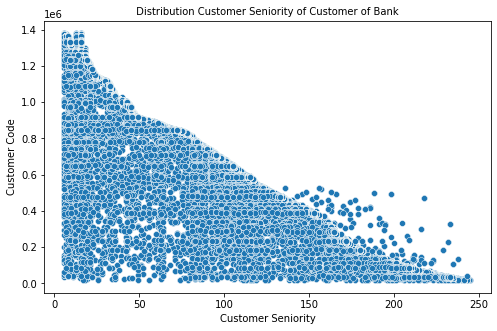

In [277]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution Customer Seniority of Customer of Bank ", loc="center",fontsize='10')

# plot
sns.scatterplot(x = "Customer Seniority", y = "Customer Code", data = df )

# Figure show
plt.show();

<h3> Distribution sex of Customer of Bank by Customer Code </h3>

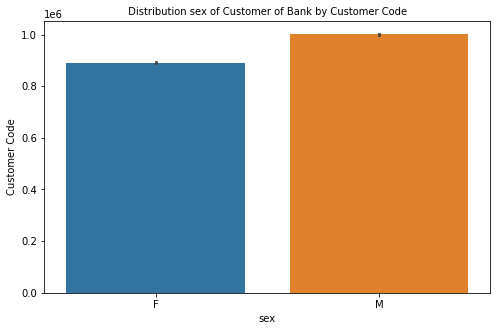

In [278]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution sex of Customer of Bank by Customer Code ", loc="center",fontsize='10')

# plot
sns.barplot(x = "sex", y = "Customer Code", data = df )

# Figure show
plt.show();

<h3> </h3>

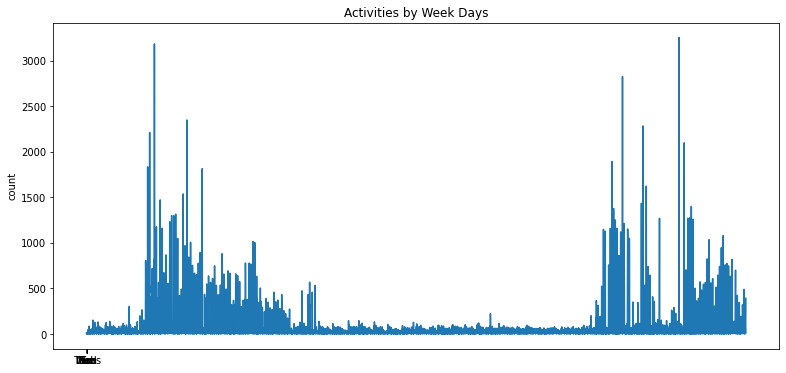

In [284]:
# Create temp_df
temp_df = df.groupby('Register Date').size().reset_index().rename(columns = {0:"count"})

# Figure Size
plt.figure(figsize = (13,6))

# Plot
ax = sns.lineplot(x = 'Register Date', y = 'count', data = temp_df);
plt.xticks(np.arange(0, 7, 1), ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);
ax.set_title("Activities by Week Days");
ax.set_xlabel("");

plt.show();

<h3>  Distribution Median Gross Income </h3>

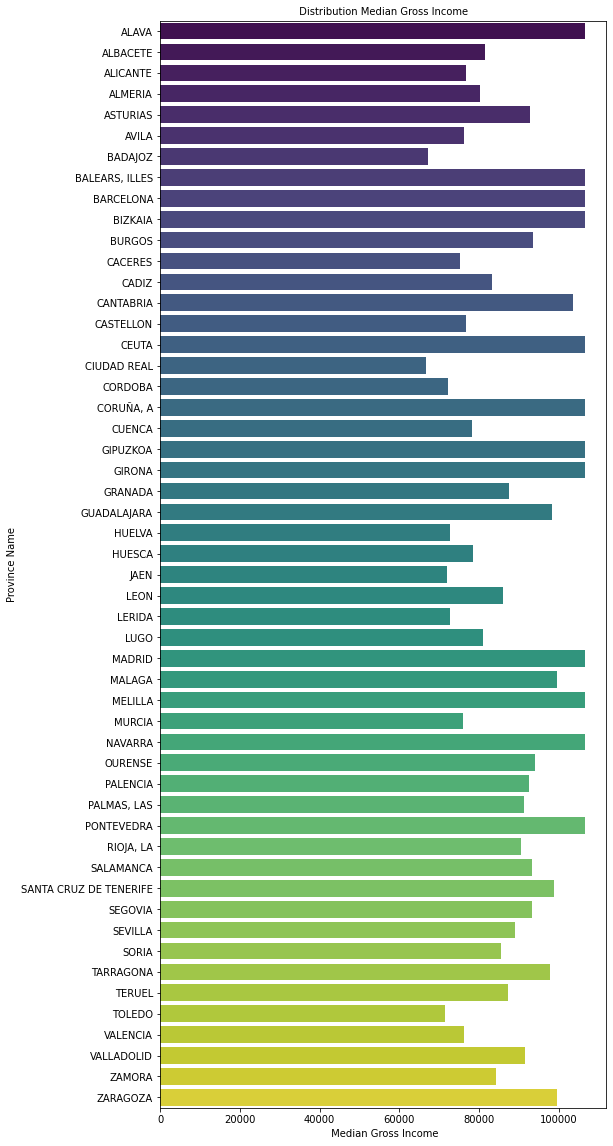

In [289]:

temp_df = df.groupby('Province Name').agg({'Gross Income' : 'median'}).sort_values('Gross Income').reset_index()

# Figure Size
plt.figure(figsize = (8, 20));

# Figure title
plt.title(" Distribution Median Gross Income ", loc="center",fontsize='10')

# Plot
sns.barplot(x = 'Gross Income', y = 'Province Name', data = temp_df, palette = "viridis");

# Label Name
plt.xlabel(" Median Gross Income");

<h5> Summary </h5>

We can see certain cities have higher median income compared to other cities. Therefore, I will impute this variable by filtering by province and then taking the median income of that province.



In [303]:
prod_cols = [
    "Saving Account", "Guarantees", "Current Accounts" ,"Derivada Account","Payroll Account"
    ,"Junior Account","More Particular Account","Particular Account","Particular Plus Account"
    ,"Short-term Deposits","Medium-term Deposits","Long-term Deposits","E-account","Funds"
    ,"Mortgage" ,"Pensions","Loans" ,"Taxes","Credit Card","Securities" ,"Home Account","Payroll"
    ,"Nom Pensions","Direct Debit"
]


labels = [
    "Saving Account", "Guarantees", "Current Accounts", "Derivada Account", "Payroll Account",
    "Junior Account", "Más particular Account", "particular Account", "particular Plus Account",
    "Short-term deposits", "Medium-term deposits", "Long-term deposits", "e-account", 
    "Funds", "Mortgage", "Pensions", "Loans", "Taxes", "Credit Card", "Securities", 
    "Home Account", "Payroll", "Nom Pensions", "Direct Debit"
]


In [304]:
# Create product_df
product_df = df.groupby('age').agg({col : 'sum' for col in prod_cols})
product_df

,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,More Particular Account,Particular Account,Particular Plus Account,Short-term Deposits,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Nom Pensions,Direct Debit
age,,,,,,,,,,,,,,,,,,,,,
4,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,6852,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,28349,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,42271,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,36964,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,31542,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3> Distribution of Products among Customers by Age </h3>

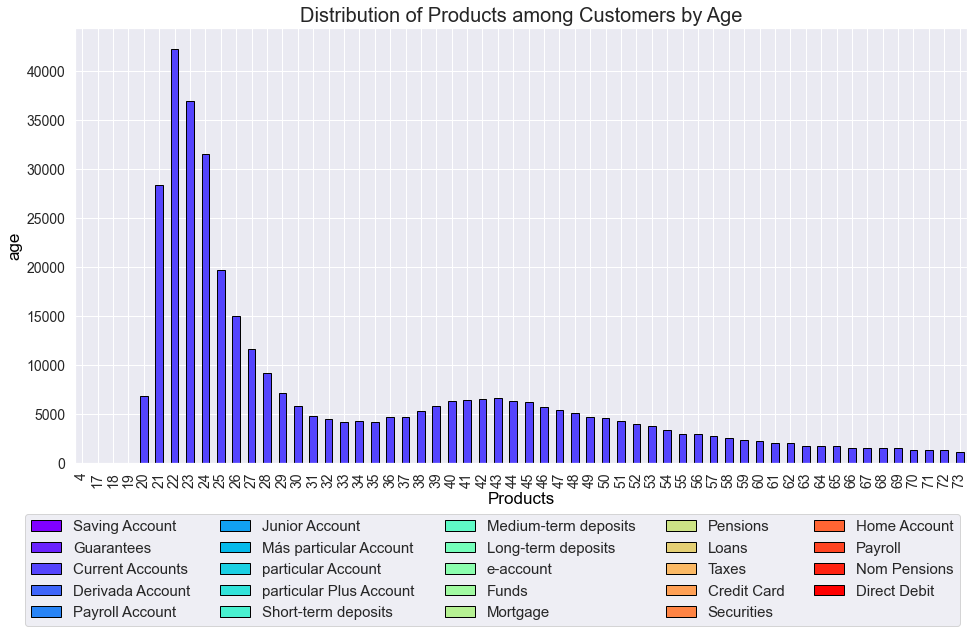

In [327]:
# plot
product_df.plot(kind='bar', stacked=True, fontsize=14, figsize=[16,8], colormap='rainbow', 
               edgecolor = "black")

# Plot Title
plt.title('Distribution of Products among Customers by Age', fontsize=20) 

# Plot Label
plt.xlabel('Products', fontsize=17, color='black') 
plt.ylabel('age', fontsize=17, color='black') 

# Plot Legend
plt.legend(labels = labels, prop={'size':15}, loc=1, bbox_to_anchor=(1.0, -0.1), ncol = 5);


<h5> Summary </h5>

Santander Product Recommendation
https://medium.com/@ravitee/santander-product-recommendation-ee4122d15072

In [309]:
#Proportion of products by age of customers
prod_prop = product_df.div(product_df.sum(axis = 1), axis = 0)


<h3>Proportion of Products among Customers by Age </h3>

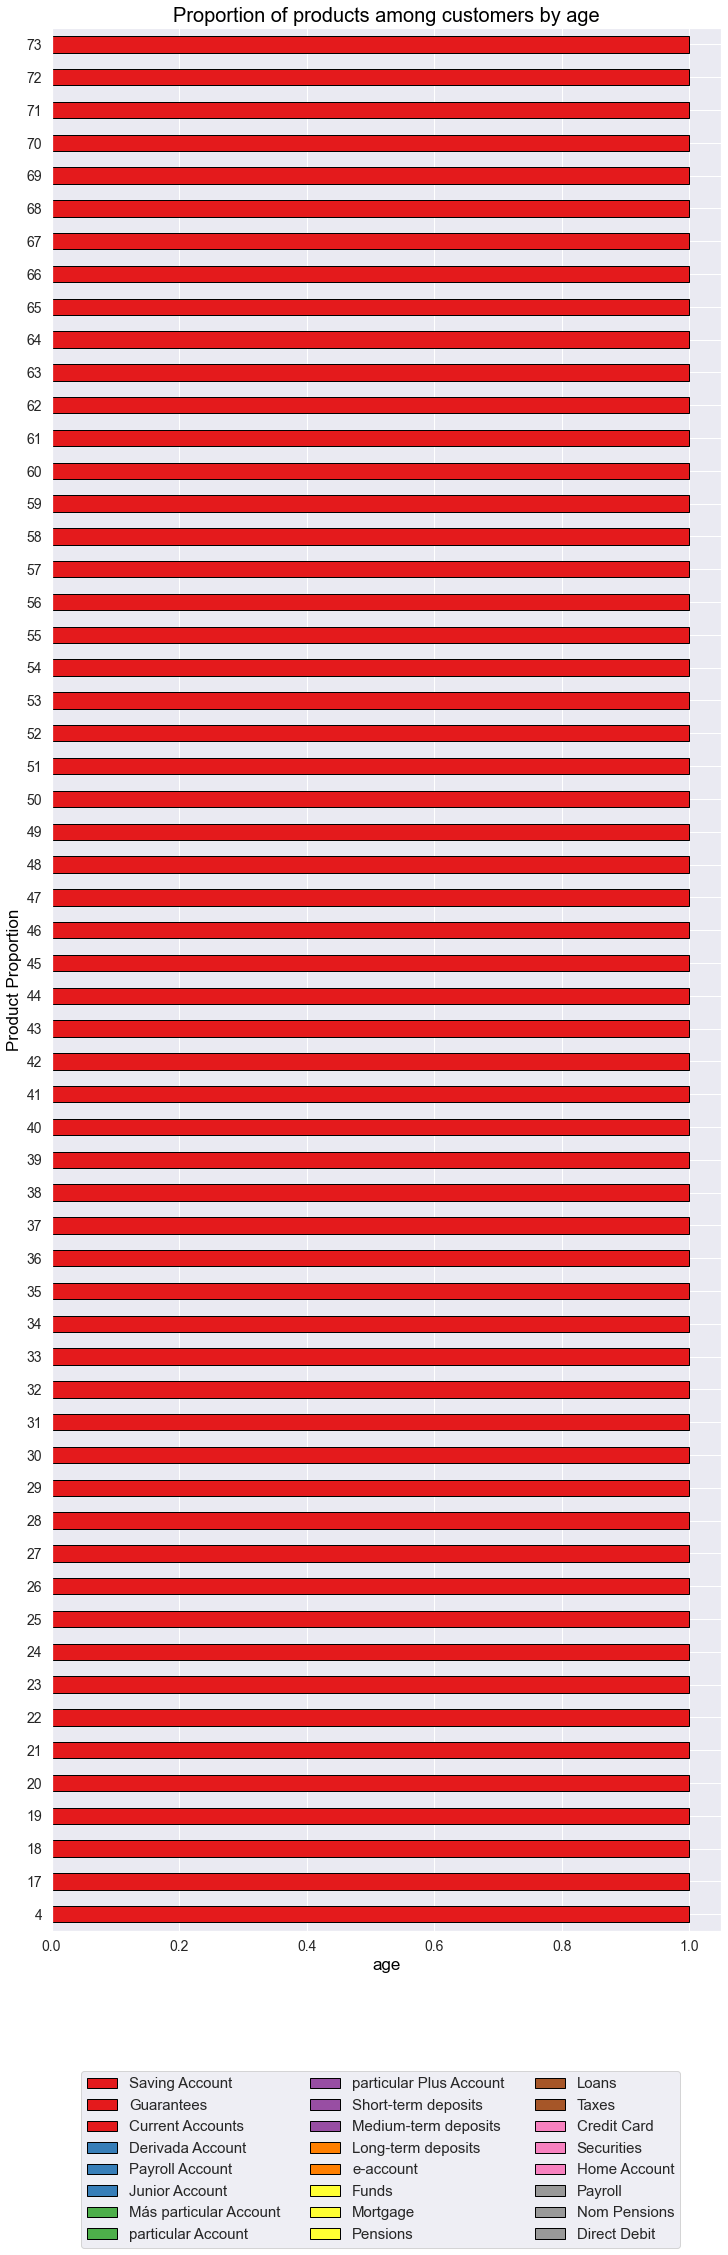

In [312]:
prod_prop.plot(kind = 'barh', stacked = True, fontsize=14, figsize=[12,35], colormap='Set1', 
               edgecolor = "black");

plt.title('Proportion of products among customers by age', fontsize=20, color='black') ;
plt.xlabel('age', fontsize=17, color='black') ;
plt.ylabel('Product Proportion', fontsize=17, color='black') ;
plt.legend(labels = labels, prop={'size':15}, loc=1, bbox_to_anchor=(0.95, -0.07), ncol = 3);


<hr>

## 4. Feature Engineering

<hr>

## 5. Model Building

<hr>

## 6. Model Evaluation

<hr>

## 7. Presentation (Recommendation slide is must)

<hr>

## 8. Document the challenges.

<hr>

## Done